# 축구선수 유망주 예측

## 1. 데이터 로드 및 탐색

In [146]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import MaxNLocator

# 시각화 스타일 설정
#sns.set_palette('husl')
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [147]:
# 데이터 로드
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(f'Train 데이터 크기: {train.shape}')
print(f'Test 데이터 크기: {test.shape}')


Train 데이터 크기: (3019, 66)
Test 데이터 크기: (1626, 65)


In [148]:
# 데이터 확인
print('=== Train 데이터 상위 10개 ===' )
display(train.head(10))

print('\n=== Test 데이터 상위 10개 ===')
display(test.head(10))

=== Train 데이터 상위 10개 ===


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,3.2353,3.9394,6.3158,6.2295,4.8864,2.4176,6.7045,5.1807,1.8391,5.1087,2.7586,1.8889,5.3571,5.7303,4.8193,6.0976,5.0000,4.5312,5.3333,4.8684,6.8493,6.6667,6.4789,2.0690,5.7647,6.4773,4.8936,3.8095,4.5349,5.3012,6.7416,6.7816,6.6667,0.9091,0.7955,0.3297,0.7865,0.9091,4.3836,4.6053,4.4737,4.4737,4.4737,4.6053,4.5333,4.8649,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,4.2647,5.9091,2.6316,6.2295,4.5455,7.6923,6.2500,5.4217,6.5517,7.3913,6.4368,5.2222,4.5238,5.8427,8.4337,7.1951,6.9737,6.4062,8.8000,6.9737,6.8493,7.4074,7.0423,7.5862,3.7647,3.7500,7.1277,6.4286,8.6047,6.1446,2.8090,3.3333,2.9762,1.2500,1.1364,0.6593,0.6742,1.3636,6.9863,6.8421,6.8421,6.8421,6.8421,6.8421,6.6667,6.4865,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,3.9706,3.9394,4.8684,4.4262,5.9091,4.0659,5.2273,5.5422,2.1839,5.3261,3.3333,4.4444,5.4762,5.6180,6.7470,6.8293,6.1842,1.8750,6.1333,3.1579,6.1644,6.6667,4.2254,4.2529,4.0000,4.8864,5.6383,4.1667,4.0698,3.7349,5.0562,5.9770,5.9524,0.7955,0.9091,1.3187,1.0112,1.0227,4.5205,5.2632,4.7368,4.7368,4.7368,5.2632,4.9333,5.2703,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,0.4412,0.3030,4.6053,4.0984,1.9318,1.6484,4.4318,2.6506,2.6437,2.0652,2.6437,2.3333,2.0238,2.8090,5.5422,5.7317,3.2895,2.6562,4.4000,2.3684,6.0274,5.5556,4.3662,2.2989,4.0000,5.5682,2.2340,2.1429,3.2558,3.2530,5.2809,5.0575,5.2381,1.2500,0.7955,0.8791,0.8989,1.3636,2.3288,2.3684,2.2368,2.2368,2.2368,2.3684,2.1333,2.2973,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,5.4412,6.9697,1.3158,5.9016,6.8182,7.9121,6.2500,6.6265,7.2414,7.7174,4.8276,6.7778,5.1190,7.5281,9.1566,7.9268,8.4211,6.5625,6.6667,6.9737,3.0137,7.1605,6.3380,7.5862,5.4118,1.7045,7.9787,6.3095,6.8605,6.3855,2.5843,1.6092,1.0714,1.0227,0.6818,1.2088,1.3483,0.4545,7.6712,7.7632,7.6316,7.6316,7.6316,7.7632,7.4667,7.5676,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0
5,TRAIN_0005,18,177,73,LB,Left,Medium,Medium,5.0725,1.1842,0.8824,2.7273,4.0789,4.2623,3.8636,2.0879,3.7500,1.9277,1.9540,5.1087,2.9885,2.5556,1.9048,2.8090,6.2651,5.4878,5.7895,3.4375,6.6667,0.7895,5.0685,5.3086,4.2254,2.2989,5.1765,5.4545,4.2553,3.0952,3.7209,3.1325,4.1573,4.8276,5.5952,0.6818,0.9091,0.9890,0.4494,0.5682,2.7397,3.5526,3.1579,3.1579,3.1579,3.5526,3.0667,3.3784,2.7397,3.3784,4.3662,3.5714,4.3662,4.5714,4.3056,4.5714,0.625,0
6,TRAIN_0006,20,196,82,GK,Right,Medium,Medium,3.6232,5.0000,3.6765,4.0909,1.9737,3.6066,0.9091,0.2198,0.6818,2.0482,0.3448,0.5435,0.4598,0.8889,1.1905,0.6742,2.1687,1.4634,1.1842,3.4375,1.0667,2.6316,2.8767,0.6173,4.5070,0.4598,0.9412,1.0227,0.3191,4.2857,1.1628,2.0482,0.5618,0.4598,0.9524,5.7955,5.9091,5.2747,5.6180,6.0227,0.2740,0.6579,0.6579,0.6579,0.6579,0.6579,0.9333,0.5405,0.8219,0.5405,0.5634,0.5714,0.5634,0.5714,0.5556,0.5714,5.625,0
7,TRAIN_0007,21,189,64,CDM,Right,Medium,Medium,4.0580,3.5526,4.7059,4.3939,5.5263,5.7377,5.4545,3.7363,5.2273,6.8675,3.4483,6.1957,4.2529,4.0000,6.6667,5.6180,5.4217,4.7561,5.3947,4.6875,4.6667,


=== Test 데이터 상위 10개 ===


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,TEST_0000,17,184,75,GK,Right,Medium,Medium,3.7681,5.3947,4.8529,4.3939,0.7895,2.7869,0.7955,0.4396,0.7955,0.7229,0.2299,0.7609,0.6897,1.1111,2.3810,0.7865,1.3253,0.0000,1.0526,0.7812,3.8667,3.4211,5.8904,2.5926,2.3944,0.3448,1.0588,1.1364,0.3191,2.5000,1.2791,2.1687,0.5618,0.8046,0.9524,5.9091,6.2500,6.1538,5.0562,6.2500,0.0000,0.1316,0.1316,0.1316,0.1316,0.1316,0.2667,0.1351,0.5479,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.500
1,TEST_0001,19,188,80,ST,Right,High,Medium,4.9275,4.8684,1.6176,3.1818,1.4474,5.2459,2.6136,6.0440,6.2500,3.8554,4.7126,4.5652,3.4483,2.8889,1.7857,5.0562,5.5422,5.9756,5.3947,2.8125,4.6667,4.7368,6.5753,4.6914,6.0563,4.5977,5.6471,1.7045,5.4255,4.1667,5.8140,4.2169,2.2472,2.1839,1.5476,0.6818,0.7955,0.6593,1.0112,1.0227,5.0685,4.6053,4.7368,4.7368,4.7368,4.6053,4.4000,4.1892,3.4247,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.750
2,TEST_0002,17,173,68,CAM,Right,High,High,6.9565,6.3158,7.6471,8.3333,6.5789,6.0656,7.1591,7.1429,4.2045,8.7952,5.2874,8.6957,7.8161,4.7778,8.3333,8.6517,7.5904,7.3171,8.9474,7.6562,9.3333,5.0000,6.5753,8.0247,4.2254,7.2414,8.4706,8.0682,8.0851,8.4524,5.2326,7.3494,6.2921,7.5862,7.1429,0.6818,0.9091,0.9890,0.5618,1.2500,7.1233,8.4211,8.1579,8.1579,8.1579,8.4211,8.5333,8.3784,8.6301,8.3784,8.3099,8.2857,8.3099,8.1429,7.0833,8.1429,1.125
3,TEST_0003,20,178,69,CAM,Right,Medium,Medium,6.8116,6.4474,5.4412,6.8182,2.5000,5.4098,5.5682,7.3626,5.0000,6.6265,6.4368,7.7174,4.1379,6.3333,6.0714,7.5281,7.7108,6.9512,7.8947,6.4062,7.2000,5.2632,5.3425,6.6667,5.4930,6.2069,5.5294,4.2045,7.0213,7.2619,7.5581,6.6265,2.3596,3.2184,3.8095,1.0227,0.7955,1.0989,1.4607,1.3636,6.7123,7.3684,7.1053,7.1053,7.1053,7.3684,7.3333,7.1622,6.7123,7.1622,5.6338,5.1429,5.6338,5.2857,4.1667,5.2857,1.375
4,TEST_0004,19,176,72,CAM,Left,High,Low,5.5072,4.7368,4.5588,6.3636,3.1579,3.4426,4.7727,5.1648,4.0909,5.9036,4.8276,7.5000,5.8621,5.3333,6.3095,7.1910,6.5060,5.9756,6.8421,3.9062,6.9333,5.9211,5.0685,4.8148,3.5211,4.9425,4.5882,3.1818,4.4681,5.3571,5.4651,5.7831,4.7191,3.3333,4.5238,0.7955,1.2500,0.9890,0.3371,0.5682,5.2055,6.0526,5.7895,5.7895,5.7895,6.0526,6.0000,5.9459,5.4795,5.9459,5.0704,4.7143,5.0704,4.8571,4.0278,4.8571,0.750
5,TEST_0005,19,170,70,RWB,Right,High,Medium,6.0870,1.7105,2.9412,3.7879,4.7368,3.7705,4.7727,2.8571,3.9773,4.8193,2.1839,5.1087,3.5632,2.5556,4.2857,5.6180,7.2289,6.3415,6.0526,3.1250,7.3333,1.1842,5.2055,6.1728,3.2394,2.2989,4.8235,5.4545,5.1064,3.5714,3.3721,2.7711,5.5056,5.4023,5.2381,1.3636,1.4773,1.0989,0.8989,0.5682,3.6986,4.7368,4.2105,4.2105,4.2105,4.7368,4.4000,4.8649,4.3836,4.8649,5.4930,4.8571,5.4930,5.5714,4.8611,5.5714,1.000
6,TEST_0006,20,186,82,ST,Right,High,Low,4.0580,6.4474,2.7941,4.3939,1.4474,4.9180,3.5227,7.5824,7.0455,4.8193,5.4023,5.6522,4.1379,4.0000,2.9762,6.5169,5.6627,4.5122,5.5263,3.5938,4.2667,5.5263,6.5753,4.8148,7.0423,6.0920,2.1176,1.3636,5.9574,4.5238,7.5581,3.9759,1.6854,2.7586,1.3095,0.9091,0.4545,1.0989,0.5618,0.6818,6.1644,5.5263,5.6579,5.6579,5.6579,5.5263,5.3333,5.0000,4.5205,5.0000,3.3803,3.0000,3.3803,3.2857,3.0556,3.2857,0.625
7,TEST_0007,20,177,66,CAM,Right,High,Medium,5.0725,4.7368,5.2941,5.7576,4.6053,4.9180,5.5682,5.0549,4.4318,6.3855,4.8276,6.7391,5.5172,4.6667,6.5476,7.0787,6.1446,5.6098,6.3158,4.2188,7.8667,4.7368,4.5205,7.6543,4.3662,5.5172,4.9412,

## 2. 데이터 설명 및 분석 (EDA)

### 1. 데이터 설명

이 데이터셋은 축구 선수들의 다양한 능력치와 신체 정보 등을 바탕으로 유망주(`Prospect`) 여부를 예측하기 위한 것으로 보입니다.

#### 주요 컬럼 정보:
- **ID**: 각 선수의 고유 식별자 (예: TRAIN_0000)
- **Personal Attributes**:
    - `Age`: 나이
    - `Height`: 키 (cm)
    - `Weight`: 몸무게 (kg)
    - `Position`: 포지션 (예: CB, ST, RB 등)
    - `PreferredFoot`: 주발 (Right, Left)
- **Work Rates**:
    - `AttackingWorkRate`: 공격 활동량 (Low, Medium, High)
    - `DefensiveWorkRate`: 수비 활동량
- **Skill Ratings (Total & Specific)**:
    - `PaceTotal`, `ShootingTotal`, `PassingTotal`, `DribblingTotal`, `DefendingTotal`, `PhysicalityTotal`: 각 분야별 종합 점수
    - `Crossing`, `Finishing`, `HeadingAccuracy`, `ShortPassing`, `Volleys`, `Dribbling`, 등 세부 기술 점수
- **Movement & Power**:
    - `Acceleration`, `SprintSpeed`, `Agility`, `Reactions`, `Balance`
    - `ShotPower`, `Jumping`, `Stamina`, `Strength`, `LongShots`
- **Mentality & Defending**:
    - `Aggression`, `Interceptions`, `Positioning`, `Vision`, `Penalties`, `Composure`
    - `Marking`, `StandingTackle`, `SlidingTackle`
- **Goalkeeping**:
    - `GKDiving`, `GKHandling`, `GKKicking`, `GKPositioning`, `GKReflexes`
- **Ratings by Position**:
    - `STRating`, `LWRating`, `LFRating`, `CFRating`, etc. (각 포지션별 평점)
- **Target**:
    - `Prospect`: 유망주 여부 (0 또는 1로 추정, 타겟 변수)


In [149]:
# 데이터 정보 확인
print('=== Train 데이터 정보 ===')
train.info()

=== Train 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   object 
 5   PreferredFoot      3019 non-null   object 
 6   AttackingWorkRate  3019 non-null   object 
 7   DefensiveWorkRate  3019 non-null   object 
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  Hea

In [150]:
# 기술 통계량
print('=== Train 데이터 기술 통계량 ===')
train.describe()

=== Train 데이터 기술 통계량 ===


,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.00000,3019.000000,3019.000000,3019.000000
mean,19.632329,180.892348,73.081153,5.760521,4.292595,4.080918,4.708363,3.816096,4.549276,4.371896,4.345083,4.750821,5.368810,4.048384,5.415954,4.241490,3.796328,4.694633,5.555829,6.115808,6.044850,5.783241,3.927158,5.839417,4.483316,5.226804,5.300832,4.679659,4.278840,4.570037,4.255209,4.712949,4.711863,4.484968,4.634023,4.185553,4.313868,4.279642,1.492854,1.459996,1.409684,1.440693,1.487171,4.601225,5.020833,4.836344,4.836344,4.836344,5.020833,4.946363,4.961191,4.748056,4.961191,4.874432,4.508399,4.874432,4.852789,4.33072,4.852789,1.424188,0.361047
std,1.235638,6.800187,6.539758,1.298024,1.624982,1.301538,1.366596,2.029423,1.414989,1.790045,2.037801,1.718073,1.627738,1.743603,1.971838,1.748832,1.532390,1.643123,1.798204,1.844954,1.822515,1.930989,1.247837,1.898949,1.508987,1.447769,1.807786,1.683236,1.990667,1.715511,2.174812,1.915240,1.445694,1.647784,1.327883,2.104758,2.251930,2.248174,1.723756,1.662393,1.605038,1.610872,1.754476,1.737719,1.841542,1.780348,1.780348,1.780348,1.841542,1.782596,1.814854,1.677262,1.814854,1.815744,1.809723,1.815744,1.877633,1.88076,1.877633,1.606925,0.480384
min,16.000000,160.000000,49.000000,0.724600,0.526300,0.000000,0.000000,0.000000,0.000000,0.113600,0.000000,0.113600,0.602400,0.000000,0.217400,0.000000,0.111100,0.595200,0.337100,0.000000,0.000000,0.131600,0.000000,0.133300,0.263200,1.095900,0.123500,0.281700,0.000000,0.000000,0.227300,0.106400,0.595200,0.000000,0.602400,0.112400,0.114900,0.238100,0.340900,0.340900,0.329700,0.337100,0.340900,0.000000,0.131600,0.131600,0.131600,0.131600,0.131600,0.133300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000
25%,19.000000,176.000000,69.000000,4.927500,3.092100,3.235300,3.939400,1.842100,3.606600,3.295500,2.802200,4.090900,4.698800,2.988500,4.891300,3.218400,2.888900,3.571400,5.056200,5.662700,5.487800,4.868400,3.125000,4.800000,3.421100,4.520500,4.691400,3.521100,2.873600,3.352950,2.159100,3.723400,3.630950,3.604700,3.855400,2.247200,2.183900,2.023800,0.681800,0.681800,0.659300,0.674200,0.681800,3.972600,4.342100,4.078900,4.078900,4.078900,4.342100,4.266700,4.459500,4.109600,4.459500,4.225400,3.571400,4.225400,4.000000,3.05560,4.000000,0.750000,0.000000
50%,20.000000,180.000000,73.000000,5.797100,4.605300,4.117600,4.848500,4.210500,4.590200,4.772700,4.615400,5.000000,5.783100,4.252900,5.978300,4.367800,3.777800,5.000000,6.067400,6.506000,6.341500,6.052600,3.906200,6.133300,4.605300,5.342500,5.679000,4.647900,4.597700,4.823500,4.886400,5.319100,4.881000,4.651200,4.698800,4.606700,4.942500,4.881000,1.022700,0.909100,0.879100,1.011200,0.909100,4.931500,5.526300,5

In [151]:
# 결측치 확인
print('=== Train 결측치 ===' )
print(train.isnull().sum())
print(f'\n결측치 비율(%):')
print((train.isnull().sum() / len(train) * 100).round(2))

=== Train 결측치 ===
ID          0
Age         0
Height      0
Weight      0
Position    0
           ..
LBRating    0
CBRating    0
RBRating    0
GKRating    0
Prospect    0
Length: 66, dtype: int64

결측치 비율(%):
ID          0.0
Age         0.0
Height      0.0
Weight      0.0
Position    0.0
           ... 
LBRating    0.0
CBRating    0.0
RBRating    0.0
GKRating    0.0
Prospect    0.0
Length: 66, dtype: float64


In [152]:
train = train[train['Position'] == 'GK']

# 확인
print("남은 포지션:", train['Position'].unique())
display(train.head(10))

print(f"총 컬럼 개수: {train.shape[0]}개")

남은 포지션: ['GK']


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
6,TRAIN_0006,20,196,82,GK,Right,Medium,Medium,3.6232,5.0000,3.6765,4.0909,1.9737,3.6066,0.9091,0.2198,0.6818,2.0482,0.3448,0.5435,0.4598,0.8889,1.1905,0.6742,2.1687,1.4634,1.1842,3.4375,1.0667,2.6316,2.8767,0.6173,4.5070,0.4598,0.9412,1.0227,0.3191,4.2857,1.1628,2.0482,0.5618,0.4598,0.9524,5.7955,5.9091,5.2747,5.6180,6.0227,0.2740,0.6579,0.6579,0.6579,0.6579,0.6579,0.9333,0.5405,0.8219,0.5405,0.5634,0.5714,0.5634,0.5714,0.5556,0.5714,5.625,0
29,TRAIN_0029,17,193,75,GK,Left,Medium,Medium,4.9275,5.0000,3.0882,4.6970,1.4474,3.7705,0.4545,0.3297,0.7955,1.4458,0.2299,0.7609,0.6897,1.0000,1.4286,0.8989,1.5663,1.0976,0.7895,3.1250,0.5333,2.2368,1.5068,0.8642,5.0704,0.2299,1.1765,1.1364,0.4255,1.7857,1.2791,1.0843,0.4494,0.4598,0.5952,6.8182,5.9091,4.8352,5.7303,6.4773,0.2740,0.3947,0.3947,0.3947,0.3947,0.3947,0.4000,0.2703,0.4110,0.2703,0.4225,0.4286,0.4225,0.2857,0.5556,0.2857,6.000,1
35,TRAIN_0035,17,188,68,GK,Left,Medium,Medium,3.3333,5.2632,3.3824,3.4848,1.1842,3.1148,0.6818,0.5495,0.9091,1.3253,0.2299,0.4348,0.4598,0.7778,0.8333,1.0112,0.6024,2.0732,1.0526,0.4688,2.4000,2.3684,4.9315,1.1111,2.1127,0.1149,2.1176,1.0227,0.2128,2.5000,1.5116,1.5663,0.5618,0.5747,0.8333,5.5682,6.1364,5.0549,5.2809,5.5682,0.0000,0.2632,0.2632,0.2632,0.2632,0.2632,0.2667,0.1351,0.2740,0.1351,0.2817,0.1429,0.2817,0.2857,0.4167,0.2857,5.250,1
36,TRAIN_0036,21,183,70,GK,Left,Medium,Medium,4.4928,5.2632,4.7059,4.8485,1.8421,4.5902,0.7955,0.4396,1.1364,2.8916,0.6897,1.0870,0.6897,0.8889,2.5000,1.6854,1.8072,1.7073,1.4474,1.5625,3.8667,3.2895,6.5753,0.9877,3.8028,0.6897,2.1176,1.0227,0.5319,2.7381,0.6977,1.8072,1.7978,0.9195,0.8333,6.4773,6.1364,6.0440,6.2921,6.5909,0.5479,0.7895,0.9211,0.9211,0.9211,0.7895,1.0667,0.8108,1.0959,0.8108,0.8451,1.0000,0.8451,0.7143,1.1111,0.7143,6.000,0
40,TRAIN_0040,21,194,85,GK,Right,Medium,Medium,3.9130,4.8684,4.2647,3.7879,1.5789,3.7705,0.5682,0.6593,1.0227,1.5663,0.4598,0.6522,0.6897,0.7778,1.3095,0.5618,1.4458,1.7073,0.5263,3.4375,0.4000,3.0263,1.9178,1.3580,6.0563,0.2299,1.6471,1.0227,0.2128,3.2143,1.3953,1.2048,0.6742,0.6897,0.5952,6.0227,5.7955,5.7143,5.7303,5.7955,0.5479,0.3947,0.5263,0.5263,0.5263,0.3947,0.6667,0.4054,0.6849,0.4054,0.4225,0.5714,0.4225,0.4286,0.8333,0.4286,5.625,0
50,TRAIN_0050,20,197,84,GK,Right,Medium,Medium,4.9275,5.5263,4.8529,5.1515,0.7895,4.9180,0.2273,0.0000,0.7955,2.1687,0.0000,1.6304,0.4598,0.6667,2.0238,2.2472,0.6024,1.2195,0.3947,2.1875,0.5333,3.4211,1.6438,0.3704,3.5211,0.1149,1.1765,1.0227,0.3191,3.0952,0.6977,2.1687,0.4494,0.3448,0.4762,6.8182,6.3636,6.1538,6.5169,6.8182,0.4110,0.6579,0.7895,0.7895,0.7895,0.6579,1.0667,0.6757,1.0959,0.6757,0.4225,0.5714,0.4225,0.2857,0.4167,0.2857,6.375,1
58,TRAIN_0058,21,194,79,GK,Right,Medium,Medium,4.4928,5.2632,4.4118,5.3030,2.6316,4.2623,0.9091,0.2198,0.9091,1.4458,0.6897,0.7609,0.4598,1.0000,0.8333,0.7865,2.0482,3.0488,1.1842,1.8750,0.9333,3.0263,1.6438,0.7407,4.9296,0.2299,0.9412,0.6818,0.6383,2.3810,0.4651,2.6506,1.0112,0.8046,0.8333,6.4773,6.1364,5.8242,6.0674,6.9318,0.4110,0.5263,0.5263,0.5263,0.5263,0.5263,0.5333,0.4054,0.4110,0.4054,0.5634,0.2857,0.5634,0.5714,0.5556,0.5714,6.125,1
62,TRAIN_0062,16,198,82,GK,Right,Medium,Medium,4.0580,4.7368,4.5588,3.7879,3.0263,3.4426,1.0227,0.7692,1.1364,2.4096,0.8046,1.3043,1.0345,1.1111,2.7381,1.7978,3.1325,2.5610,2.5000,1.875

총 컬럼 개수: 314개


## 3. 컬럼별 데이터 분석 및 시각화

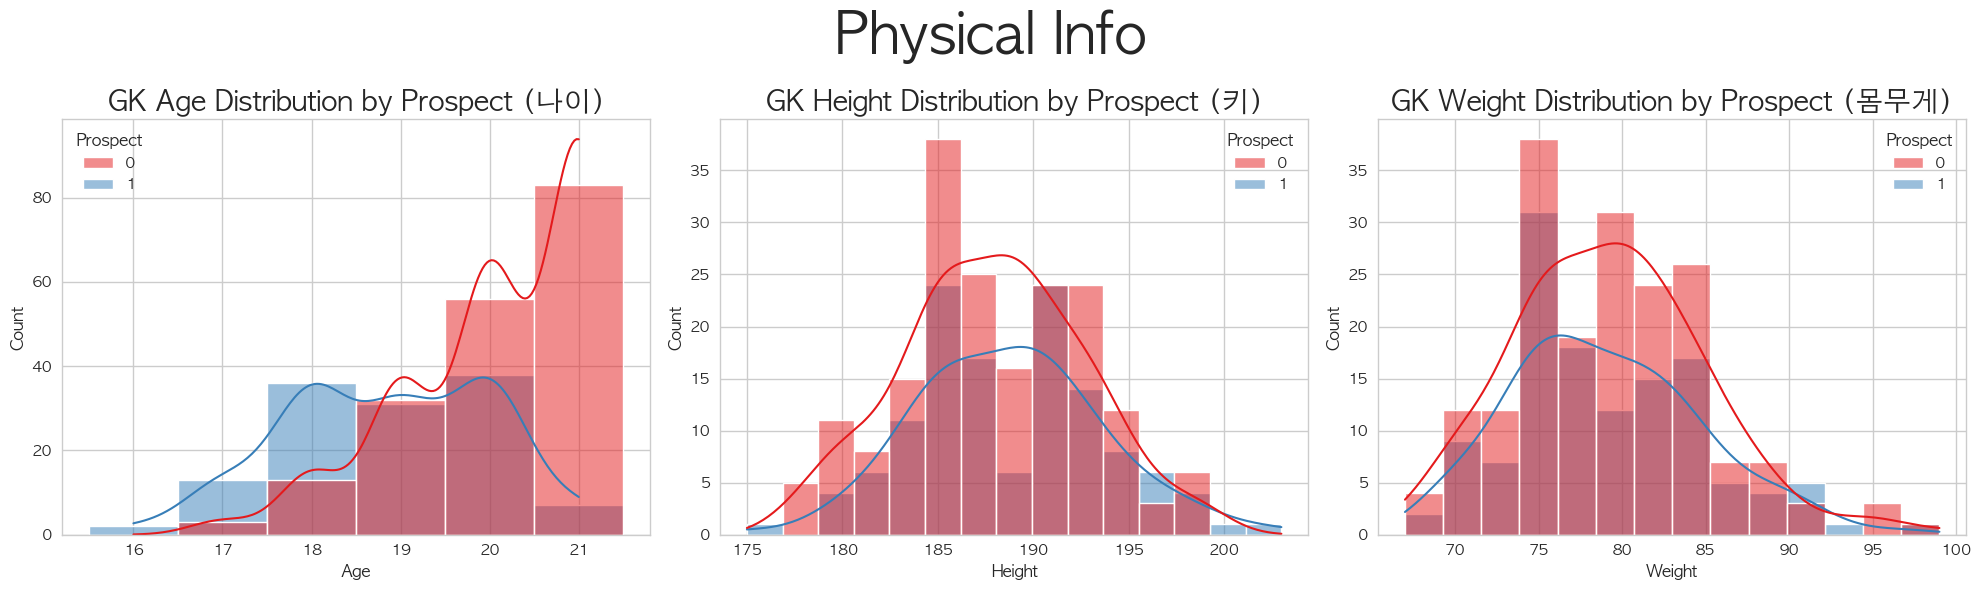

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 1. 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 도화지 준비
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Physical Info', fontsize=40, fontweight='bold')
# --- 첫 번째: 나이 (Age) ---
sns.histplot(
    data=train, 
    x='Age', 
    hue='Prospect',     # [수정] 0과 1로 쪼개기
    discrete=True, 
    kde=True, 
    ax=axes[0], 
    palette='Set1',     # [수정] 단색(color) 대신 두 가지 색(palette) 사용
    alpha=0.5           # [추가] 겹친 부분 보이게 투명도 조절
)
axes[0].set_title('GK Age Distribution by Prospect (나이)', fontsize=20) 
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

# --- 두 번째: 키 (Height) ---
sns.histplot(
    data=train, 
    x='Height', 
    hue='Prospect',     # [수정]
    kde=True, 
    ax=axes[1], 
    palette='Set1',     # [수정]
    alpha=0.5           # [추가]
)
axes[1].set_title('GK Height Distribution by Prospect (키)', fontsize=20)

# --- 세 번째: 몸무게 (Weight) ---
sns.histplot(
    data=train, 
    x='Weight', 
    hue='Prospect',     # [수정]
    kde=True, 
    ax=axes[2], 
    palette='Set1',     # [수정]
    alpha=0.5           # [추가]
)
axes[2].set_title('GK Weight Distribution by Prospect (몸무게)', fontsize=20)

plt.tight_layout()
plt.show()

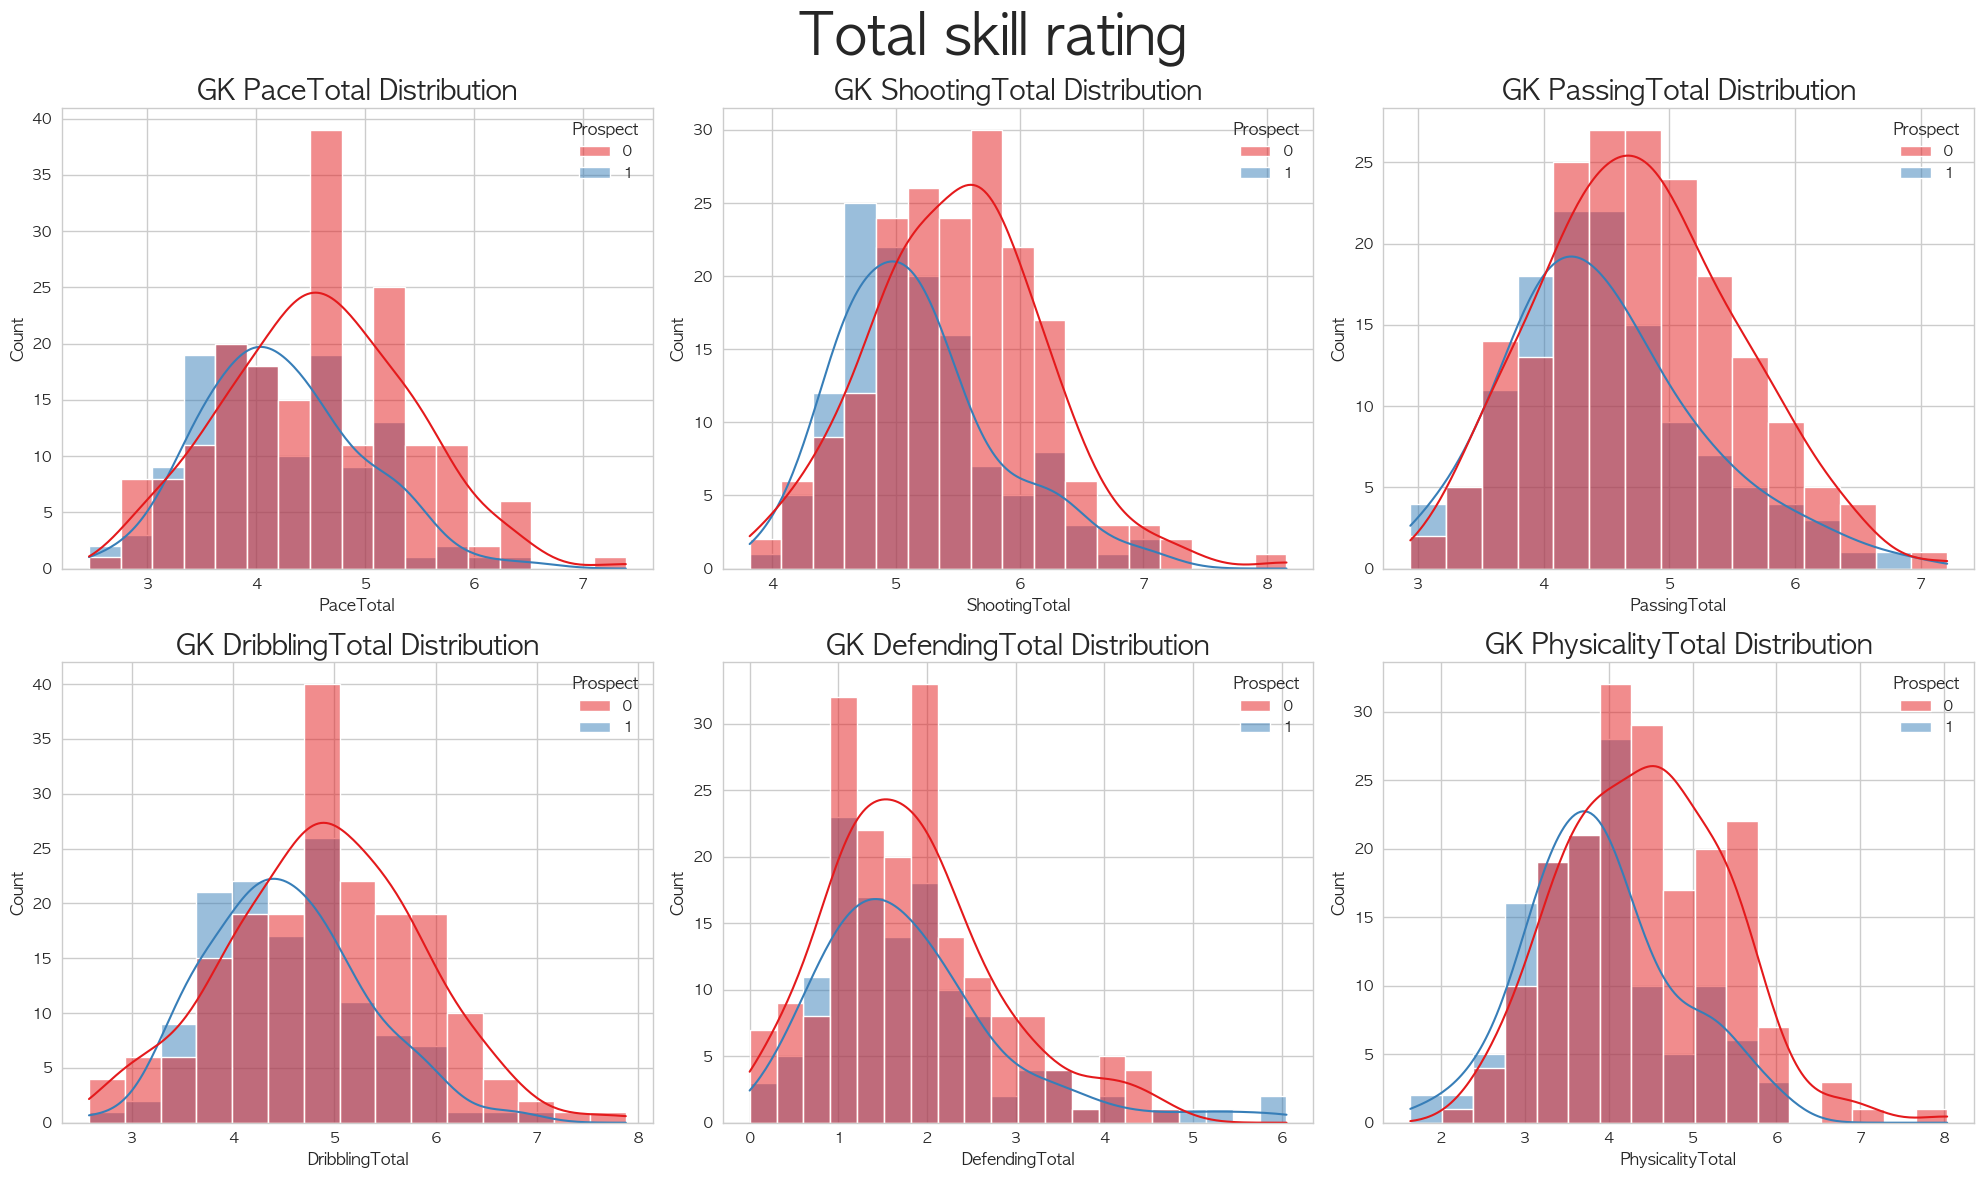

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 폰트 설정 (안전하게 포함)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 컬럼 이름 리스트
total_columns = [
    'PaceTotal',       # 속력
    'ShootingTotal',   # 슈팅
    'PassingTotal',    # 패스
    'DribblingTotal',  # 드리블
    'DefendingTotal',  # 수비
    'PhysicalityTotal' # 피지컬
]

# 3. 도화지 준비 (2줄 3칸)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
fig.suptitle('Total skill rating', fontsize=40, fontweight='bold')
# 4. 반복문으로 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 5. 마무리
plt.tight_layout()
plt.show()

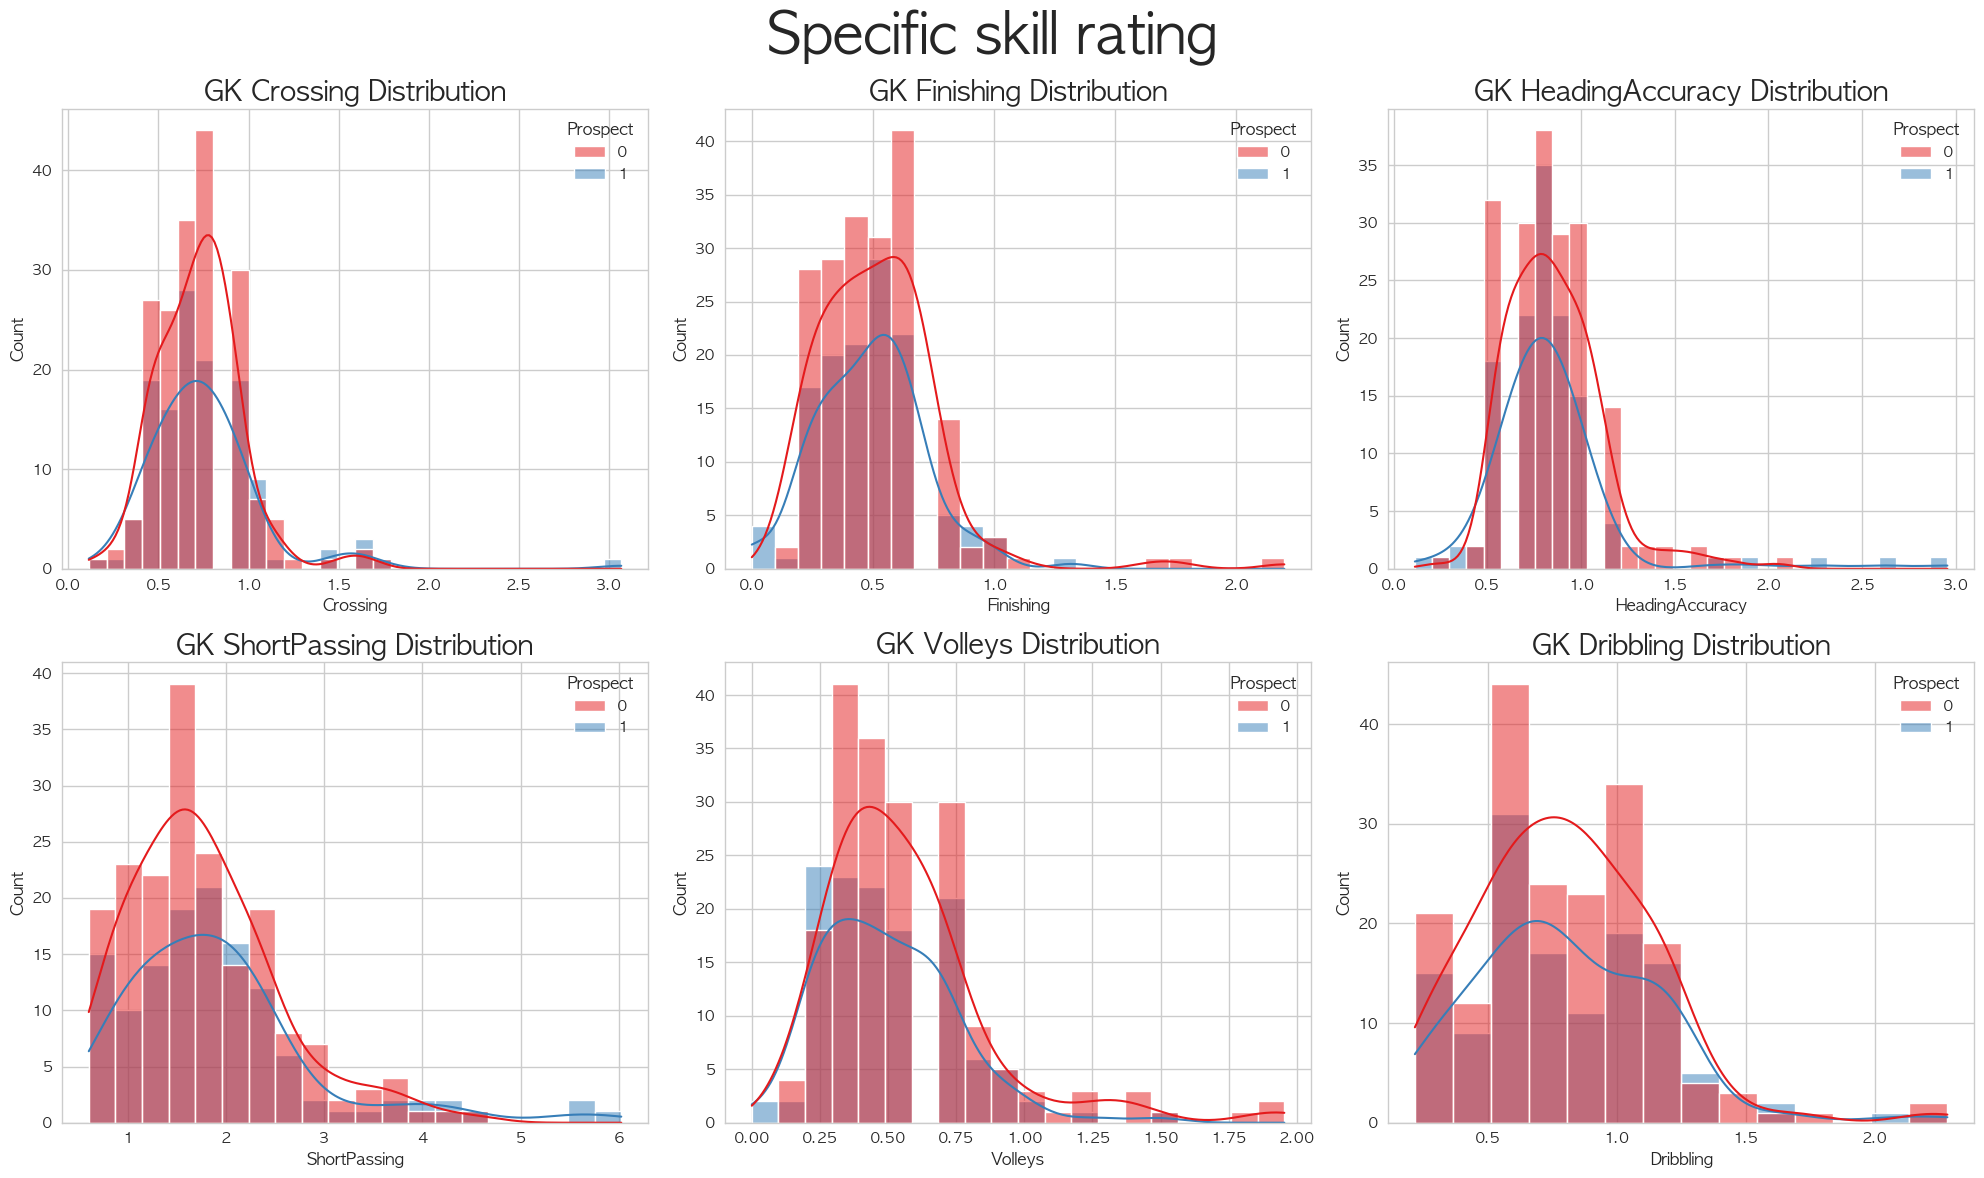

In [155]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Crossing',
   'Finishing',
   'HeadingAccuracy',
   'ShortPassing', 
   'Volleys', 
   'Dribbling'
]

# 2. 도화지 준비 (2줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(2, 3, figsize=(20, 12)) 
axes = axes.flatten() 
fig.suptitle('Specific skill rating', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

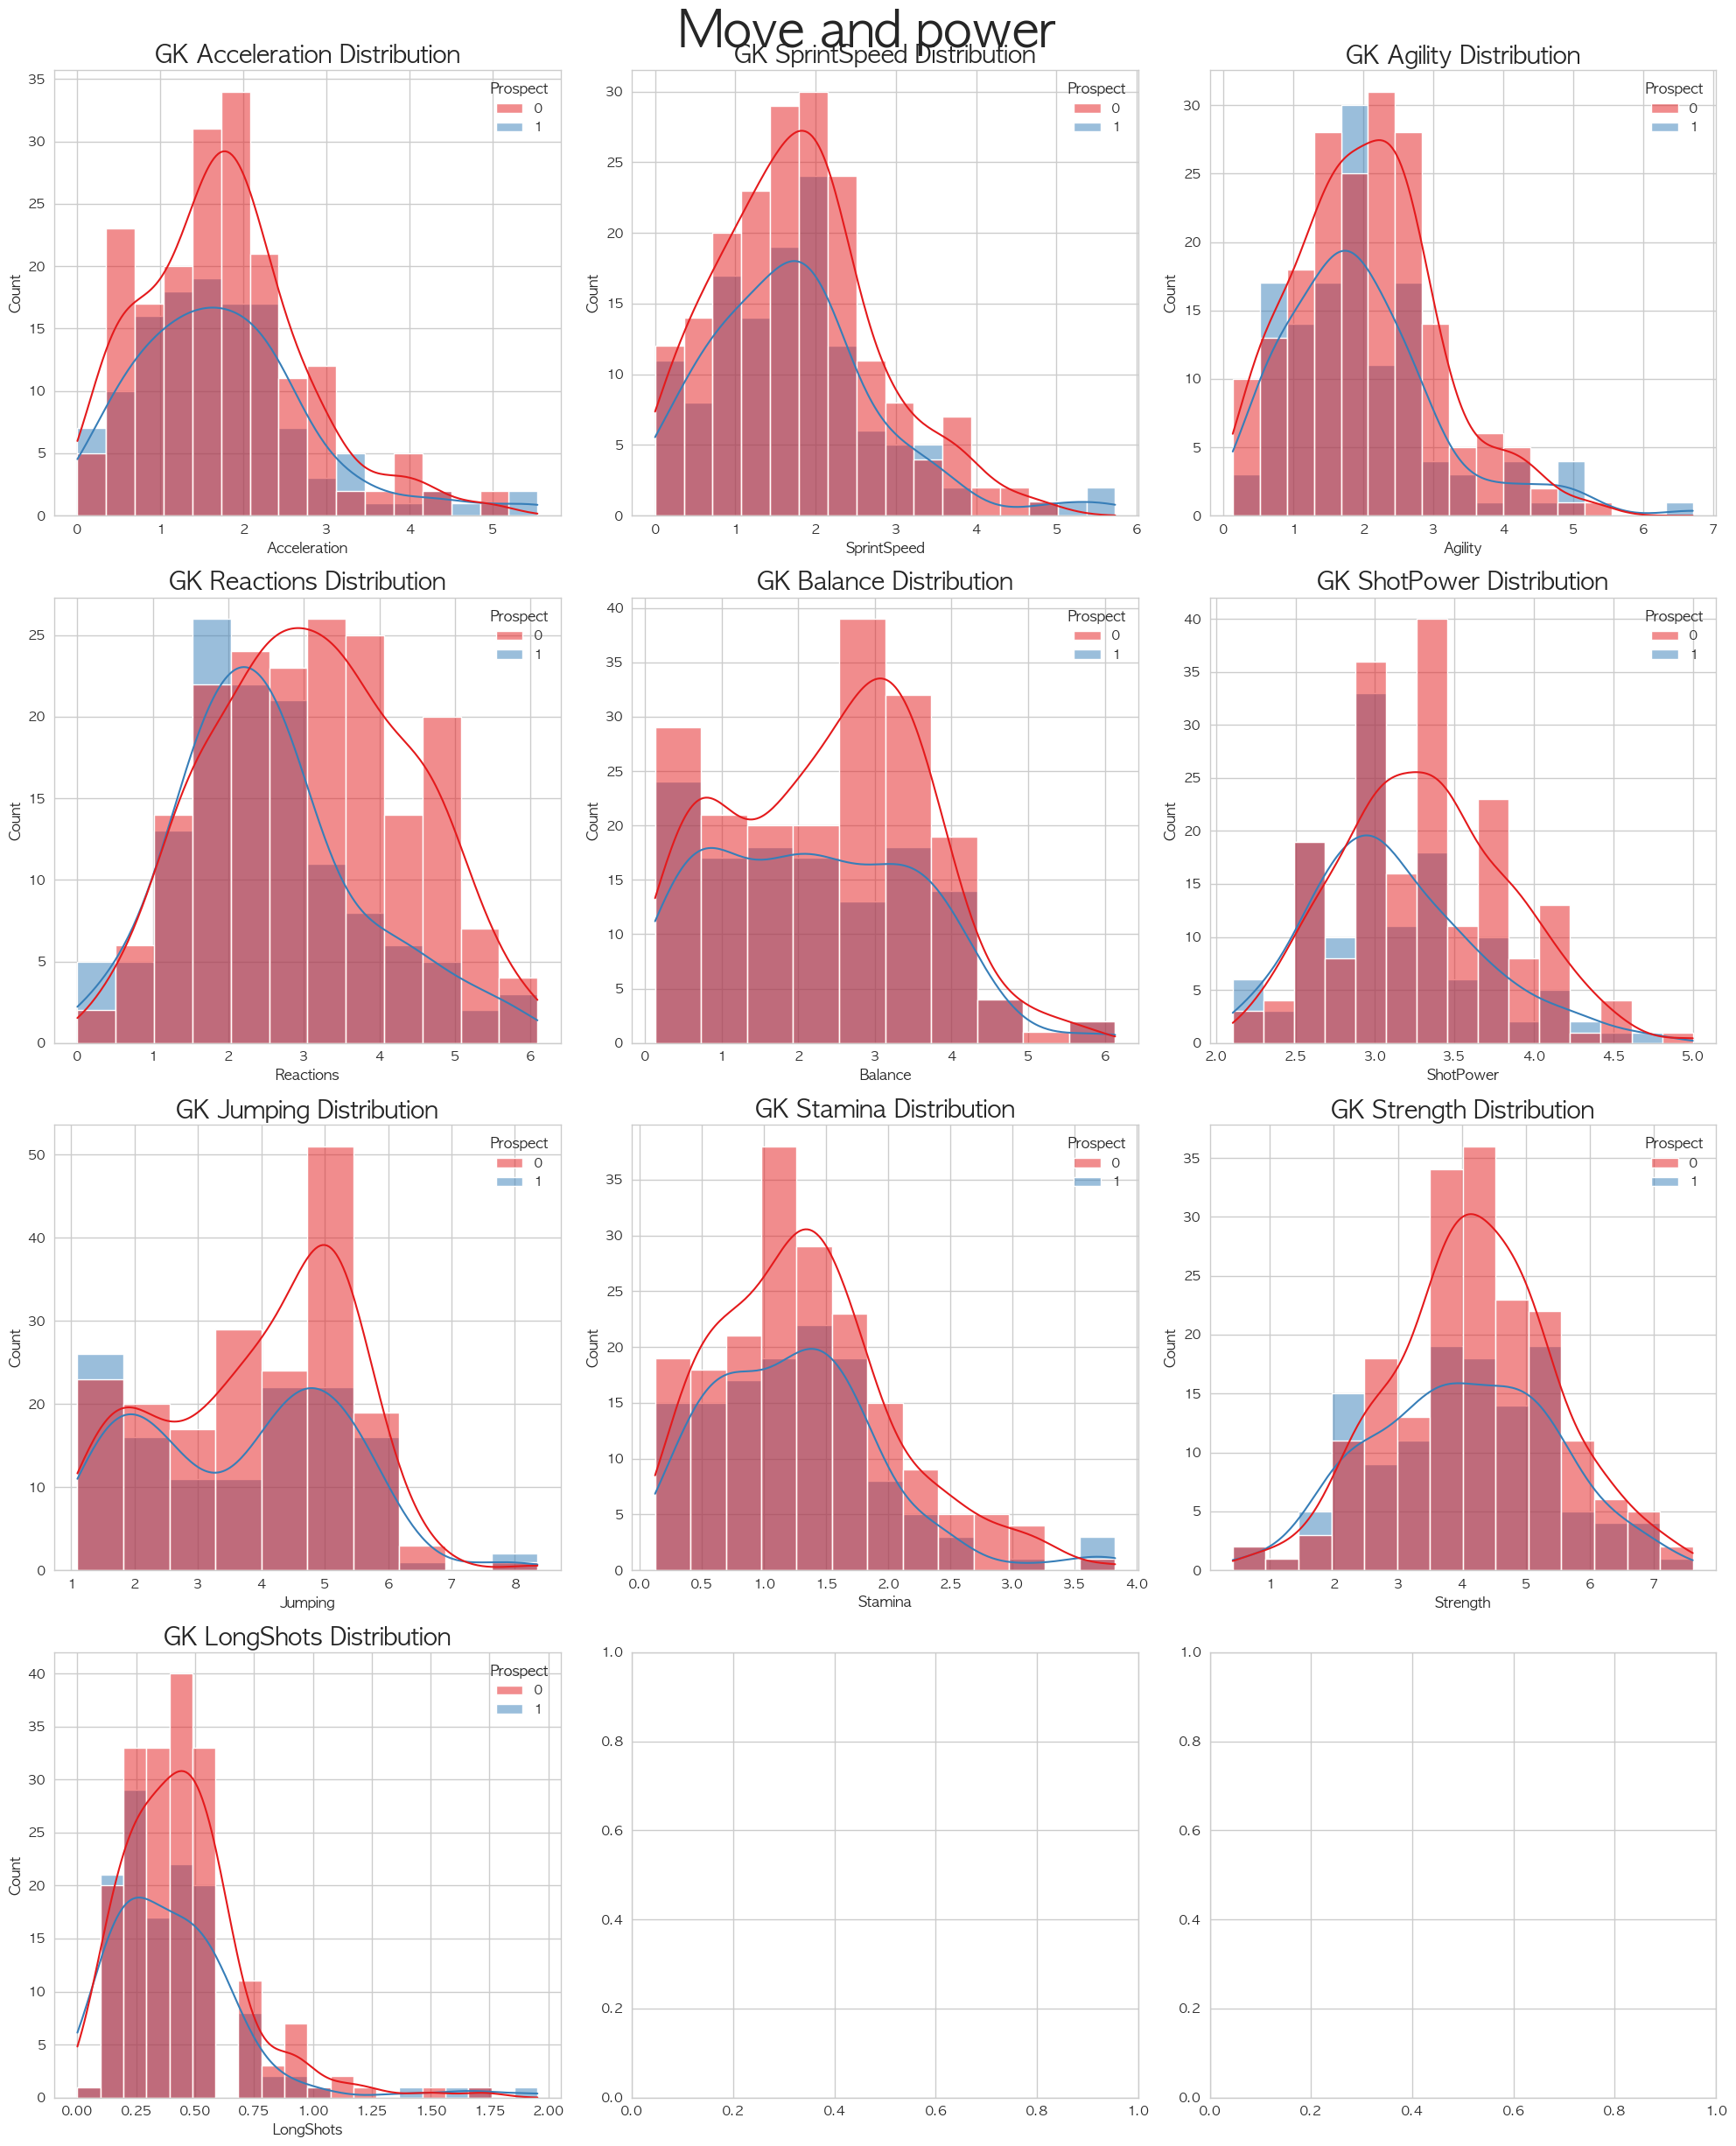

In [156]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots'
]

# 2. 도화지 준비 (4줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(4, 3, figsize=(20, 25)) 
axes = axes.flatten() 
fig.suptitle('Move and power', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

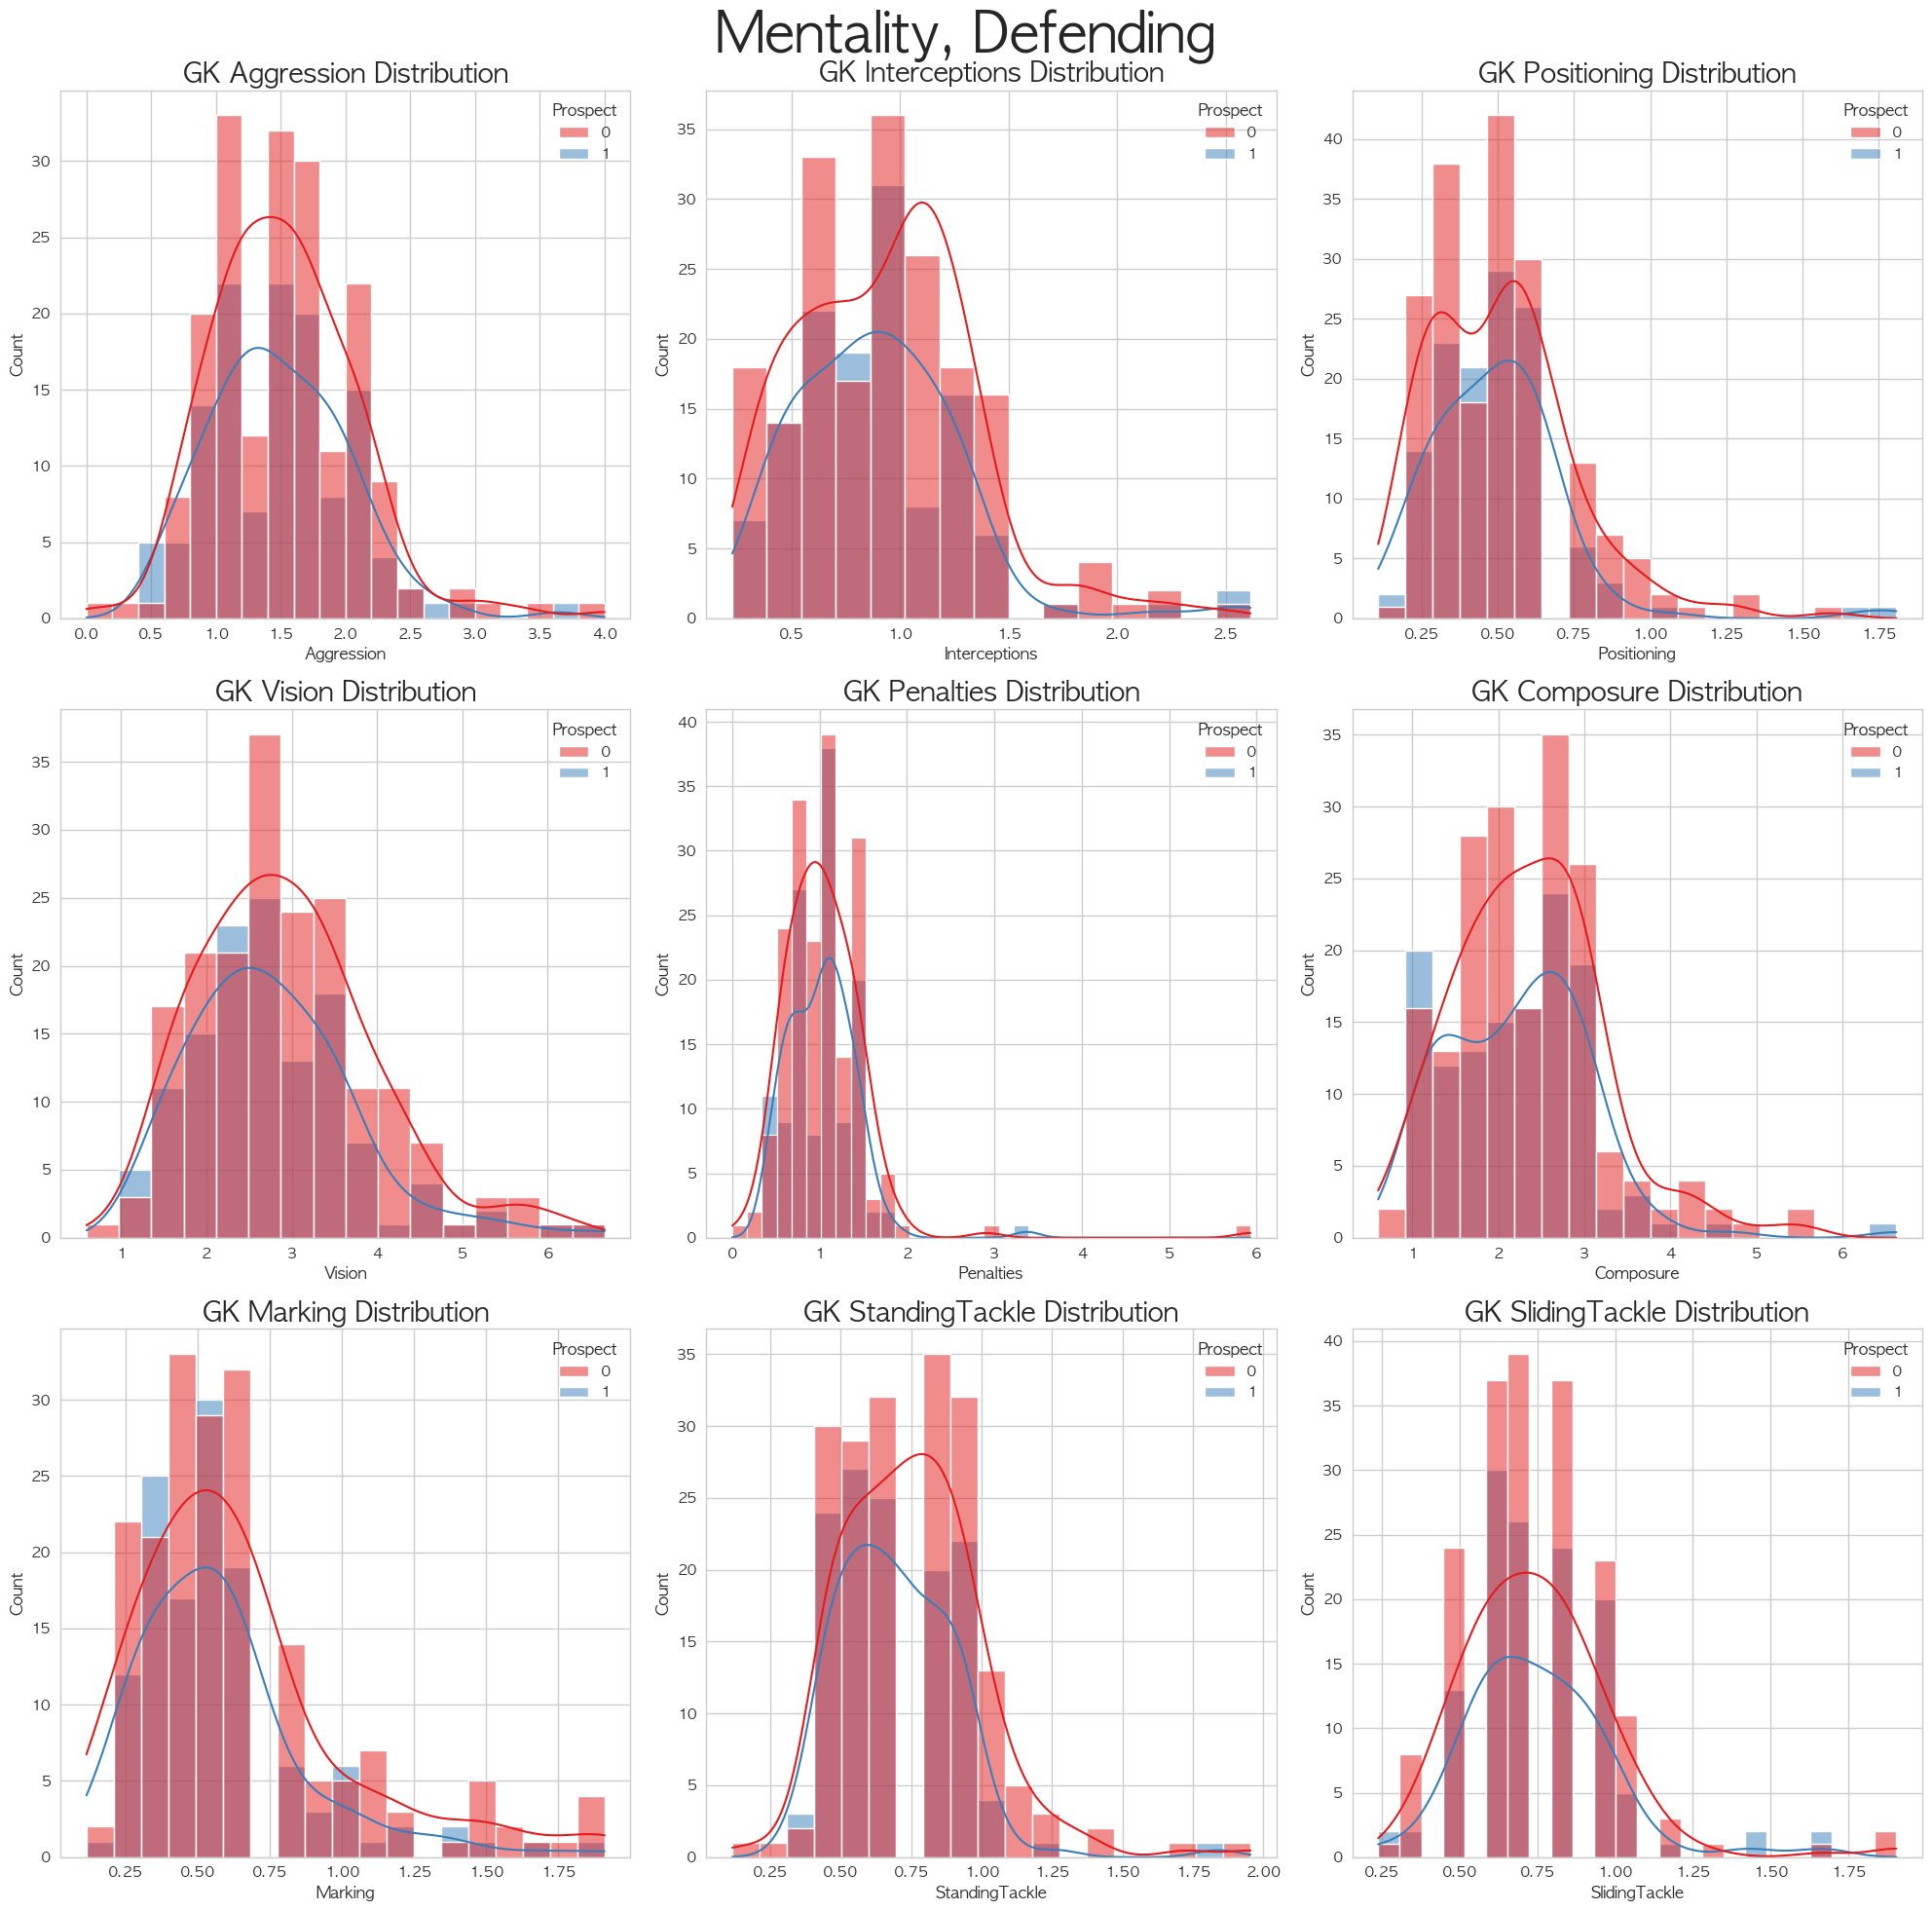

In [157]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'StandingTackle', 'SlidingTackle'
]

# 2. 도화지 준비 (3줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(3, 3, figsize=(20, 20)) 
axes = axes.flatten() 
fig.suptitle('Mentality, Defending', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

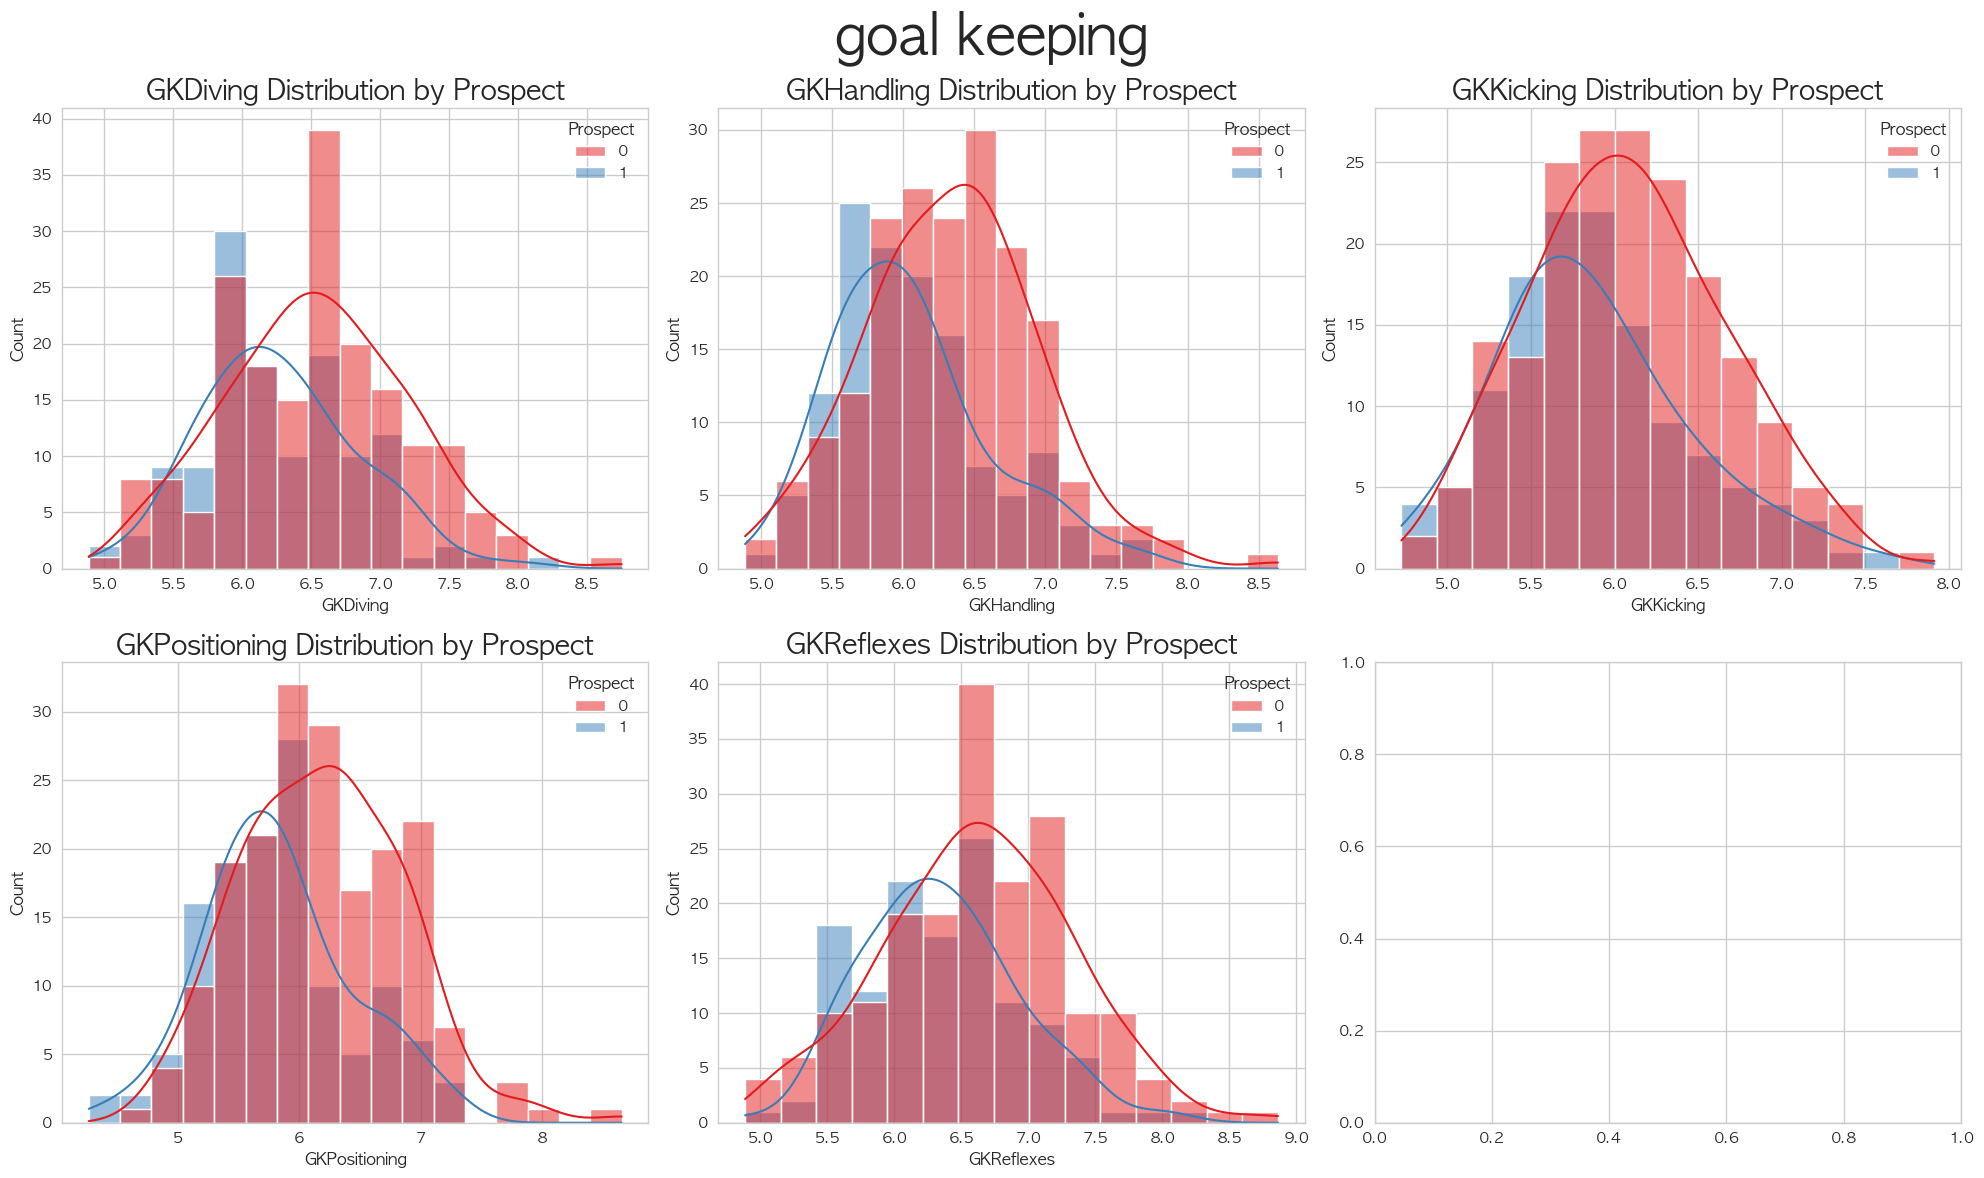

In [158]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
]

# 2. 도화지 준비 (2줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(2, 3, figsize=(20, 12)) 
axes = axes.flatten() 
fig.suptitle('goal keeping', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'{col} Distribution by Prospect', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

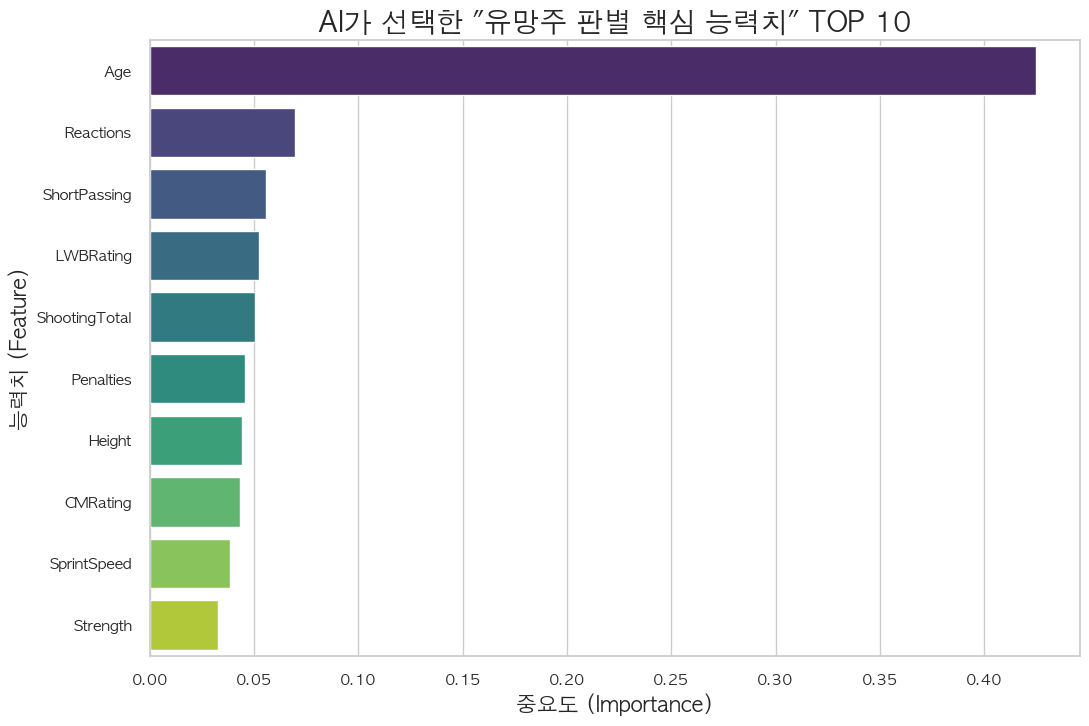

In [122]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 준비 (숫자만 사용, ID 같은 건 뺌)
# 유망주(Prospect)를 맞추기 위해 필요한 정보(X)와 정답(y)을 나눕니다.
numeric_cols = train.select_dtypes(include=['number']).columns
X = train[numeric_cols].drop(['Prospect', 'ID'], axis=1, errors='ignore') # 정답이랑 ID 제외
y = train['Prospect']

# 빈칸(NaN)이 있으면 에러 나니까 0으로 채워줍니다 (간단 버전)
X = X.fillna(0)

# 3. 모델 학습 (AI야, 공부해!)
# max_depth=5: 너무 복잡하게 생각하지 말고 핵심만 5단계로 파악해봐
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X, y)

# 4. 중요도 뽑기
importances = model.feature_importances_
feature_names = X.columns

# 보기 좋게 표로 정리
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10) # TOP 10만 뽑기

# 5. 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title('유망주 판별 핵심 능력치 TOP 10', fontsize=20, fontweight='bold')
plt.xlabel('중요도 (Importance)', fontsize=15)
plt.ylabel('능력치 (Feature)', fontsize=15)
plt.show()

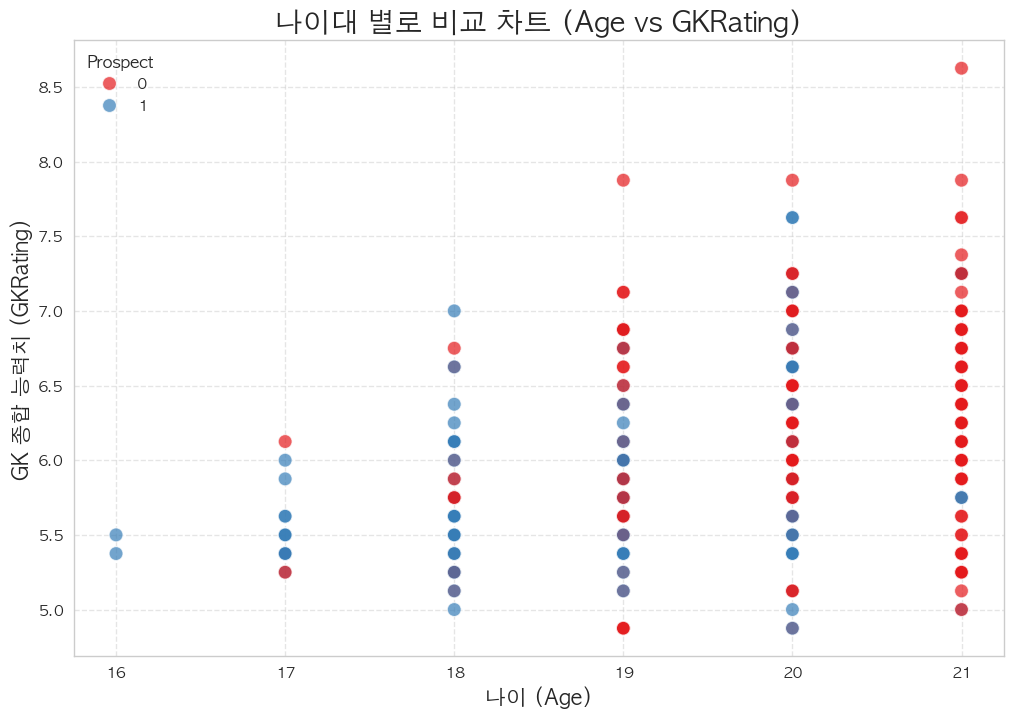

In [169]:
# 산점도 그리기 (나이 vs GKRating)
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=train, 
    x='Age', 
    y='GKRating',      # GK 종합 능력치
    hue='Prospect',    # 색깔 구분 (0 vs 1)
    palette='Set1',    # 빨강/파랑
    s=100,             # 점 크기 키움
    alpha=0.7          # 투명도
)

plt.title('나이대 별로 비교 차트 (Age vs GKRating)', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('GK 종합 능력치 (GKRating)', fontsize=15)

# 나이 칸이 딱딱 떨어지게 설정
plt.xticks([16, 17, 18, 19, 20, 21]) 

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

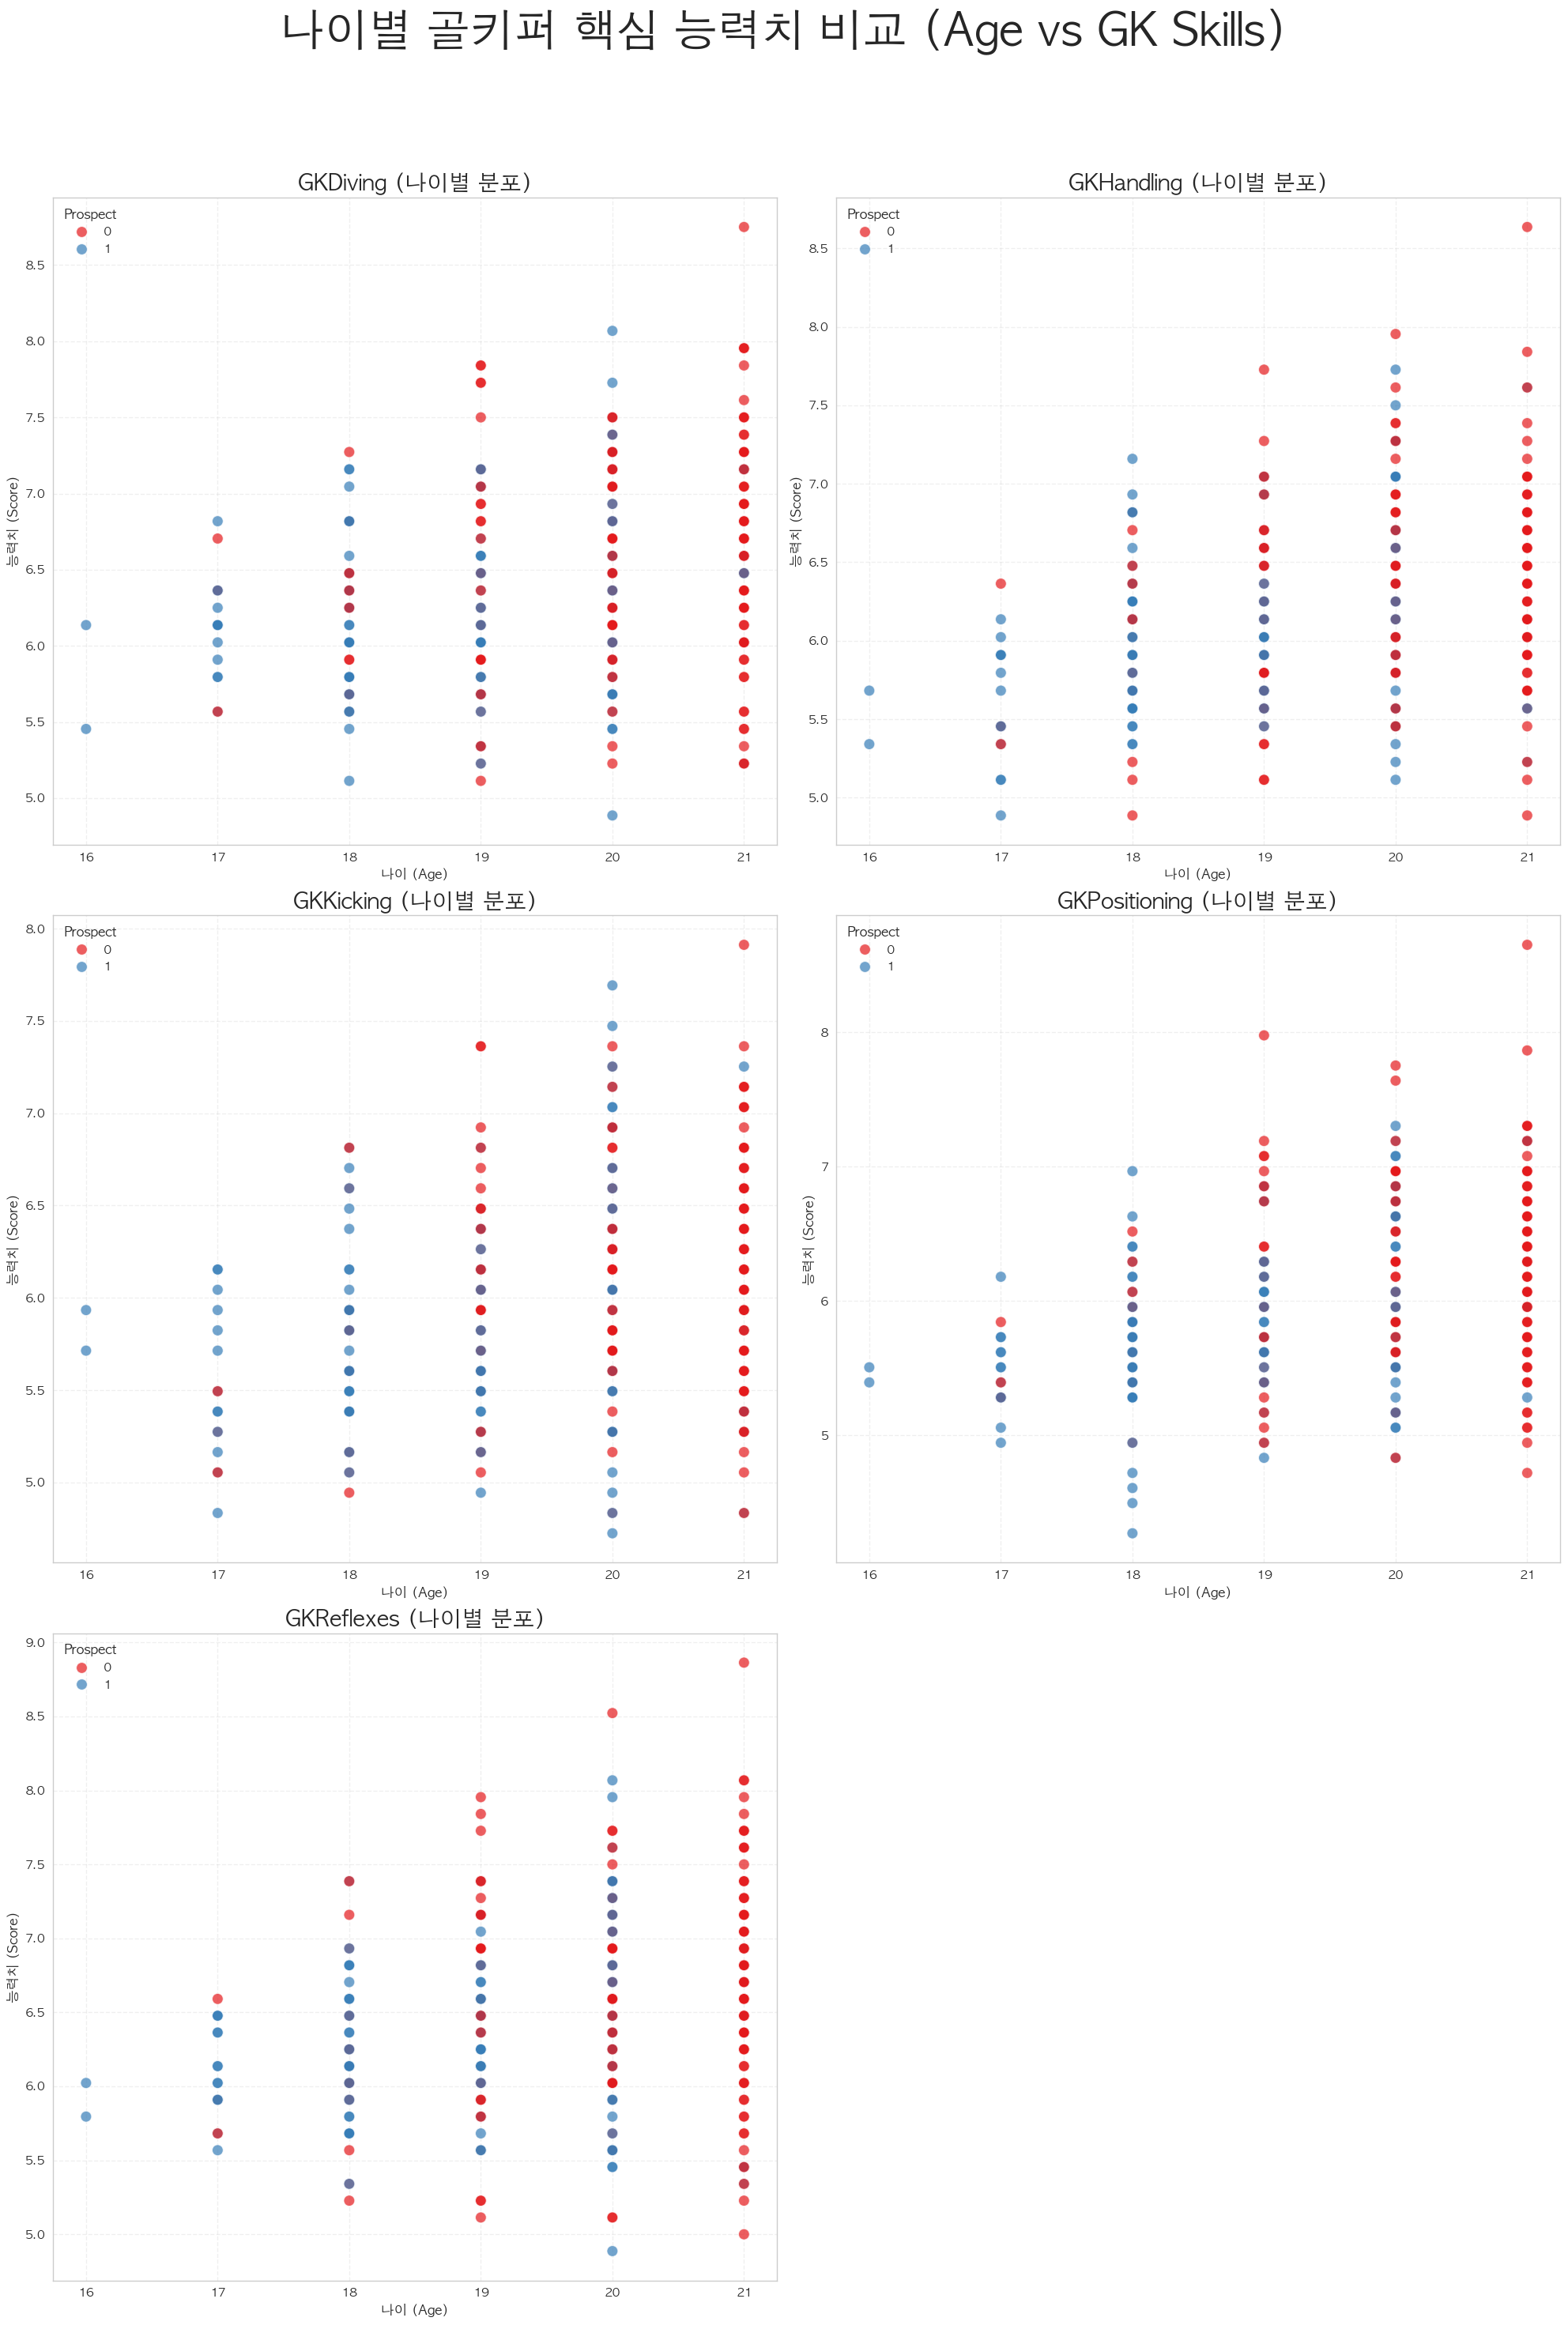

In [170]:
# 2. 분석할 5대 골키퍼 능력치 리스트
gk_cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# 3. 도화지 준비 (2줄 3칸 = 총 6칸 중 5칸 사용)
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten() # 편하게 번호로 쓰기 위해 1줄로 펼침

# 큰 제목 달기
fig.suptitle('나이별 골키퍼 핵심 능력치 비교 (Age vs GK Skills)', fontsize=40, fontweight='bold')

# 4. 반복문으로 5개 그래프 후다닥 그리기
for i, col in enumerate(gk_cols):
    sns.scatterplot(
        data=train, 
        x='Age', 
        y=col, 
        hue='Prospect',    # 핵심: 유망주(1)와 비유망주(0) 색깔 다르게!
        palette='Set1',    # 빨강 vs 파랑
        alpha=0.7,         # 점을 살짝 투명하게 해서 겹친 것도 보이게
        s=100,              # 점 크기
        ax=axes[i]
    )
    
    # 그래프 꾸미기
    axes[i].set_title(f'{col} (나이별 분포)', fontsize=20)
    axes[i].set_xlabel('나이 (Age)')
    axes[i].set_ylabel('능력치 (Score)')
    axes[i].grid(True, linestyle='--', alpha=0.3) # 격자 무늬 추가

# 5. 남는 6번째 칸(빈칸)은 깔끔하게 삭제
fig.delaxes(axes[5])

# 마무리
plt.tight_layout()
plt.subplots_adjust(top=0.9) # 큰 제목이랑 안 겹치게 간격 조절
plt.show()

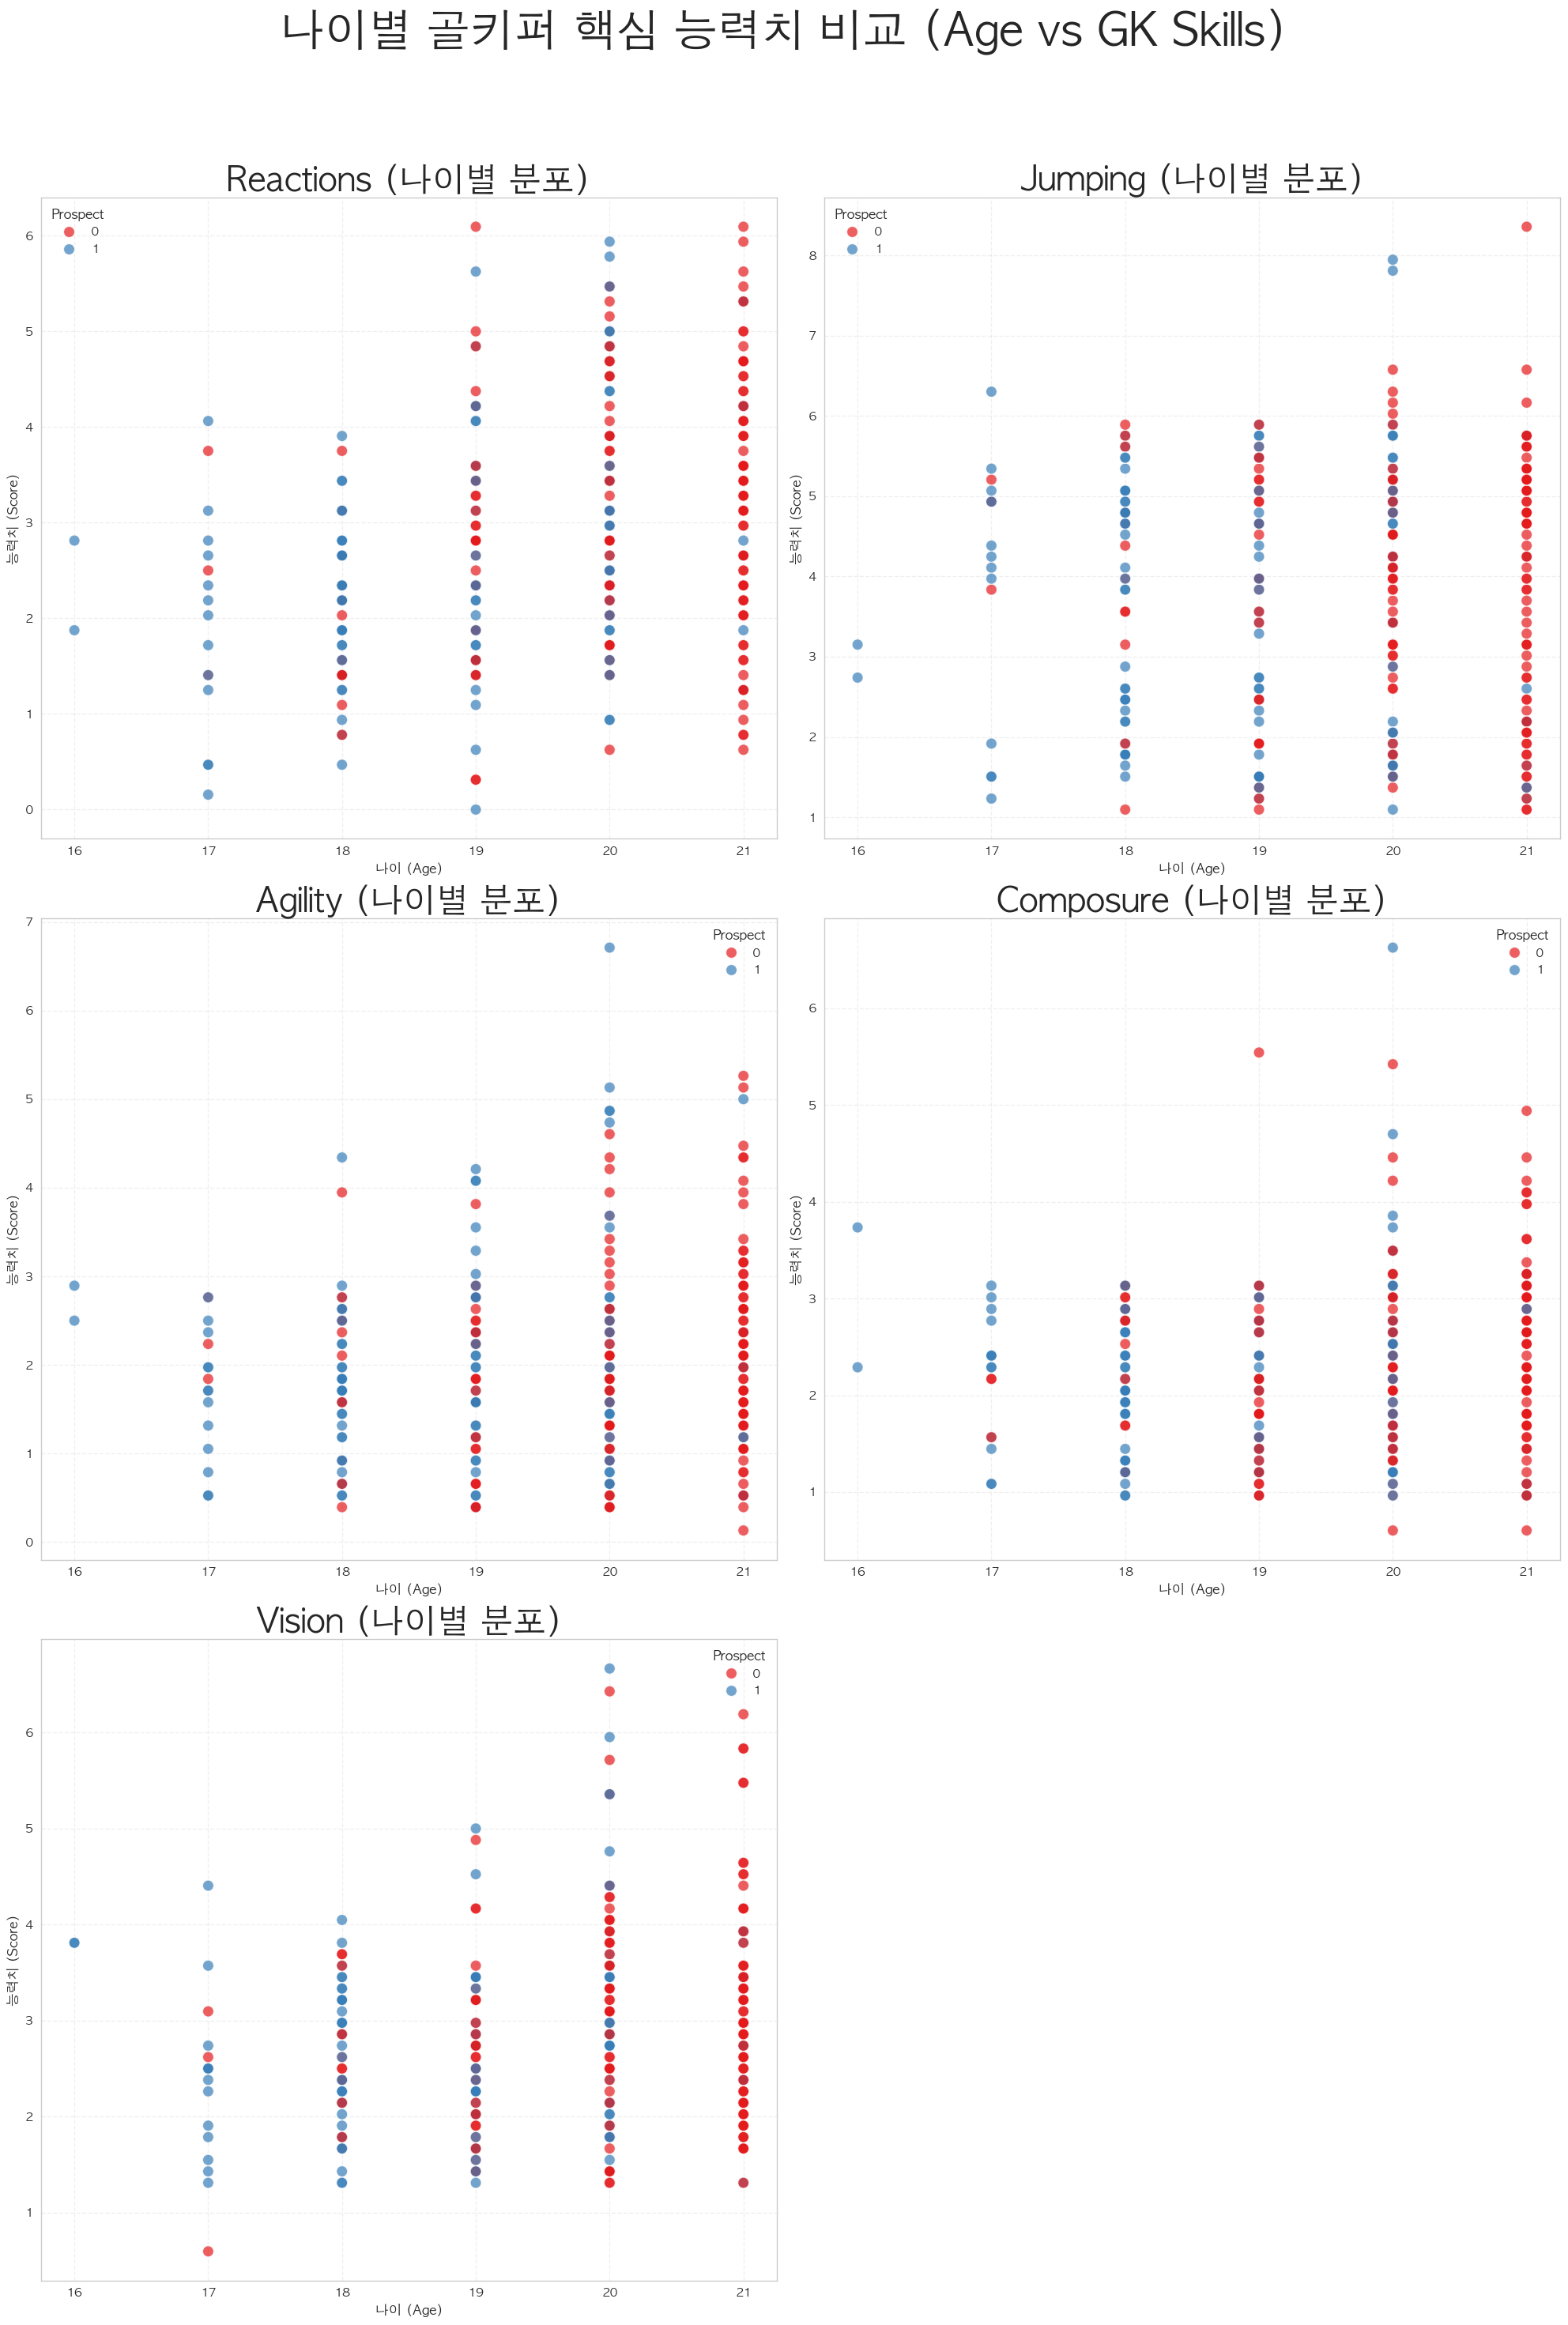

In [172]:
# 2. 분석할 5대 골키퍼 능력치 리스트
gk_cols = ['Reactions', 'Jumping', 'Agility', 'Composure', 'Vision']

# 3. 도화지 준비 (2줄 3칸 = 총 6칸 중 5칸 사용)
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten() # 편하게 번호로 쓰기 위해 1줄로 펼침

# 큰 제목 달기
fig.suptitle('나이별 골키퍼 핵심 능력치 비교 (Age vs GK Skills)', fontsize=40, fontweight='bold')

# 4. 반복문으로 5개 그래프 후다닥 그리기
for i, col in enumerate(gk_cols):
    sns.scatterplot(
        data=train, 
        x='Age', 
        y=col, 
        hue='Prospect',    # 핵심: 유망주(1)와 비유망주(0) 색깔 다르게!
        palette='Set1',    # 빨강 vs 파랑
        alpha=0.7,         # 점을 살짝 투명하게 해서 겹친 것도 보이게
        s=100,              # 점 크기
        ax=axes[i]
    )
    
    # 그래프 꾸미기
    axes[i].set_title(f'{col} (나이별 분포)', fontsize=30)
    axes[i].set_xlabel('나이 (Age)')
    axes[i].set_ylabel('능력치 (Score)')
    axes[i].grid(True, linestyle='--', alpha=0.3) # 격자 무늬 추가

# 5. 남는 6번째 칸(빈칸)은 깔끔하게 삭제
fig.delaxes(axes[5])

# 마무리
plt.tight_layout()
plt.subplots_adjust(top=0.9) # 큰 제목이랑 안 겹치게 간격 조절
plt.show()

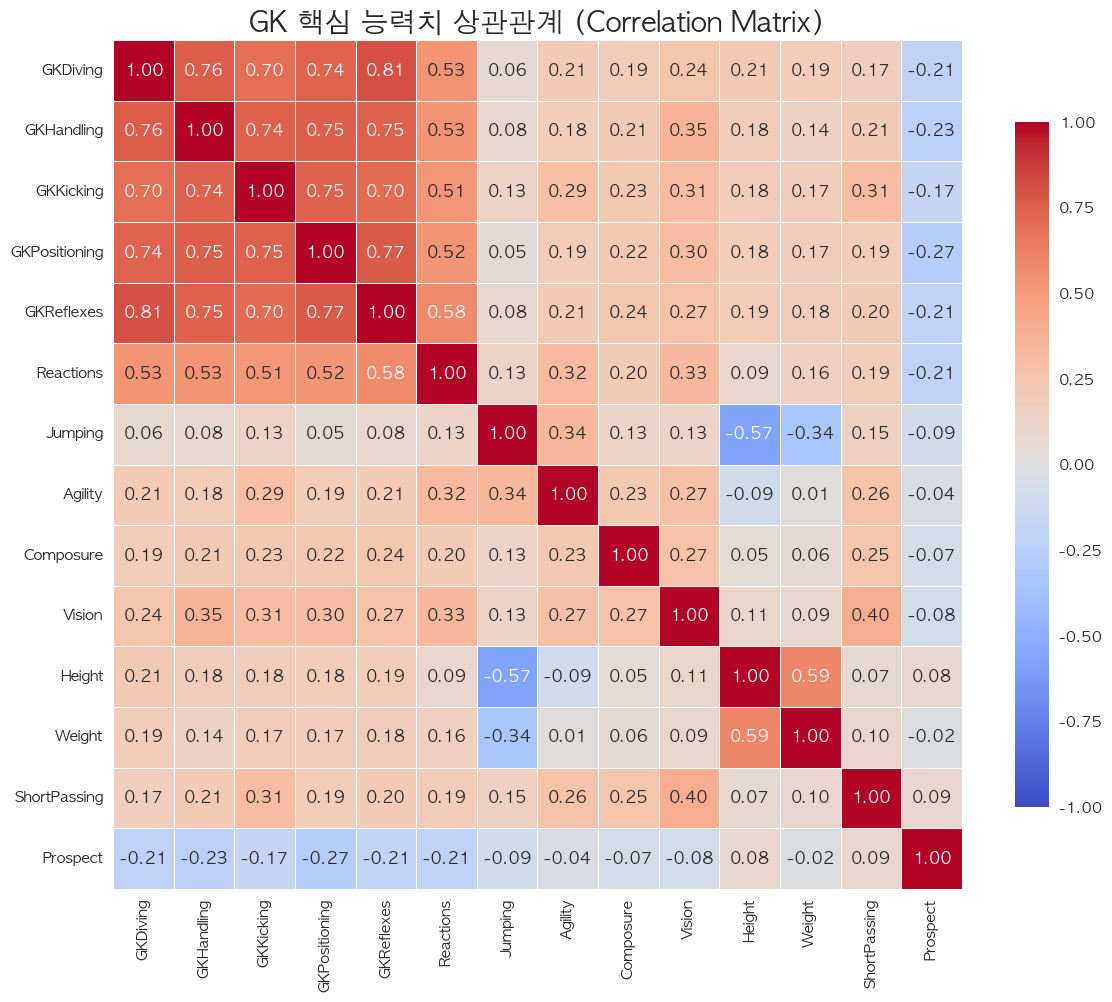

In [166]:
# 2. 분석할 컬럼 리스트 (요청하신 10개)
corr_cols = [
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
    'Reactions', 'Jumping', 'Agility', 'Composure', 'Vision','Height','Weight','ShortPassing','Prospect'
]

# 3. 상관관계 계산 (골키퍼 데이터만 사용)
# 이미 train은 GK만 필터링되어 있다고 가정하지만, 혹시 모르니 안전하게 한 번 더 필터링
gk_corr = train[train['Position'] == 'GK'][corr_cols].corr()

# 4. 히트맵 그리기
plt.figure(figsize=(12, 10))

sns.heatmap(
    gk_corr, 
    annot=True,         # 숫자 표시
    fmt='.2f',          # 소수점 2자리까지
    cmap='coolwarm',    # 빨강(양의 상관관계) vs 파랑(음의 상관관계)
    vmin=-1, vmax=1,    # 색상 범위 고정 (-1 ~ 1)
    square=True,        # 정사각형 모양 유지
    linewidths=0.5,     # 칸 사이 간격
    cbar_kws={"shrink": 0.8} # 컬러바 크기 조절
)

plt.title('GK 핵심 능력치 상관관계 (Correlation Matrix)', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

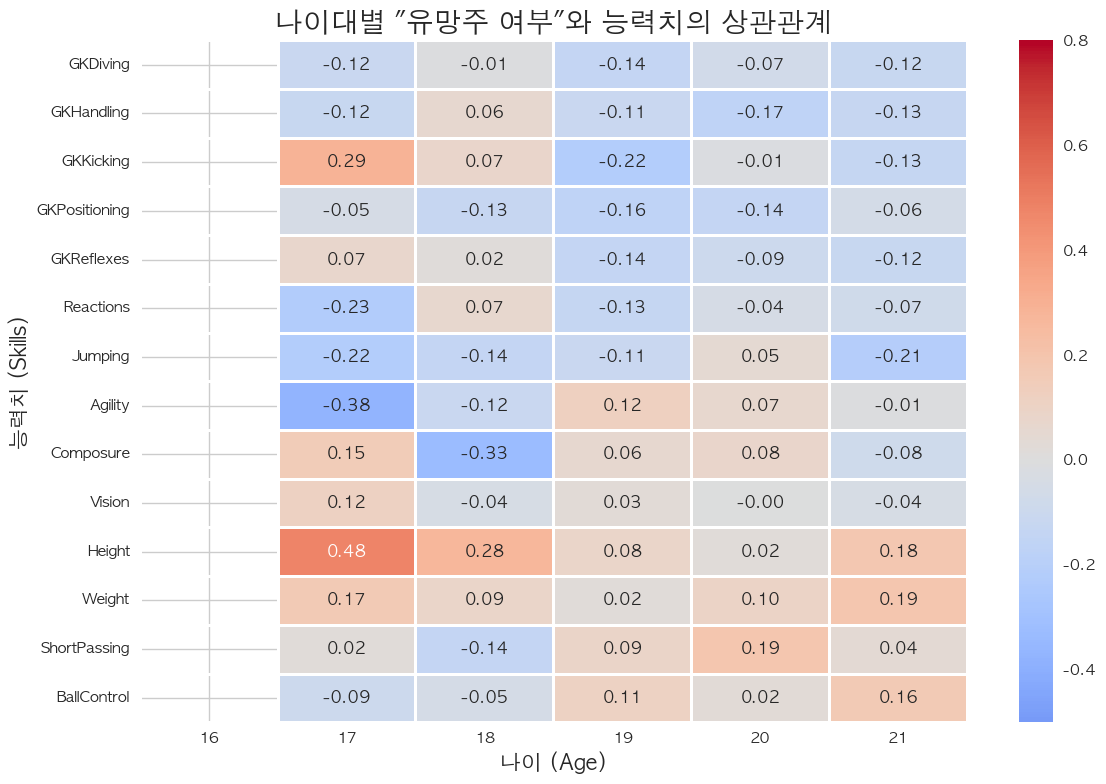

In [168]:

# 2. 분석할 컬럼 리스트
target_cols = [
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
    'Reactions', 'Jumping', 'Agility', 'Composure', 'Vision','Height','Weight','ShortPassing','BallControl'
]

# 3. [핵심] 나이별로 루프를 돌면서 상관계수를 따로 구해서 저장합니다.
age_corr_data = {}

# 데이터에 존재하는 나이들을 정렬해서 가져옴
ages = sorted(train['Age'].unique())

for age in ages:
    # 해당 나이의 선수들만 추출
    age_group = train[train['Age'] == age]
    
    # 데이터가 너무 적으면(1명 이하) 상관계수 계산 불가하므로 패스
    if len(age_group) > 1:
        # 각 능력치와 'Prospect(유망주)' 사이의 상관계수만 쏙 뽑음
        # corrwith는 특정 컬럼(Prospect)과의 상관관계만 계산해줌
        corr = age_group[target_cols].corrwith(age_group['Prospect'])
        age_corr_data[age] = corr

# 4. 데이터프레임으로 변환 (행: 능력치, 열: 나이)
age_corr_df = pd.DataFrame(age_corr_data)

# 5. 히트맵 그리기
plt.figure(figsize=(12, 8))

sns.heatmap(
    age_corr_df, 
    annot=True,         # 숫자 표시
    fmt='.2f', 
    cmap='coolwarm',    # 빨강(양의 상관관계) vs 파랑
    center=0,           # 0을 기준으로 색 나눔
    vmin=-0.5, vmax=0.8, # 색상 범위 조절 (너무 연하면 범위를 좁히세요)
    linewidths=1
)

plt.title('나이대별 "유망주 여부"와 능력치의 상관관계', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('능력치 (Skills)', fontsize=15)
plt.tight_layout()
plt.show()

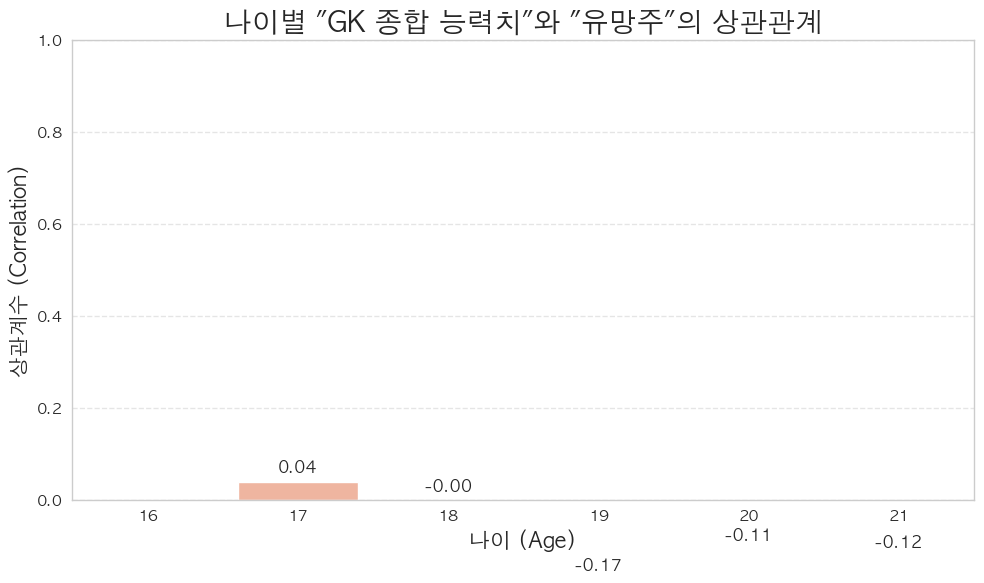

In [164]:

# 2. 데이터 준비
# (GK만 뽑고 복사본 만들기)
gk_df = train[train['Position'] == 'GK'].copy()

# 3. [핵심] 5대 능력치를 하나로 합칩니다! (평균 점수)
gk_cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gk_df['GK_Core_Score'] = gk_df[gk_cols].mean(axis=1)

# 4. 나이별로 상관계수 계산하기
age_corr_data = []

ages = sorted(gk_df['Age'].unique())

for age in ages:
    # 해당 나이의 선수들만 추출
    group = gk_df[gk_df['Age'] == age]
    
    # 데이터가 2명 이상이어야 상관계수 계산 가능
    if len(group) > 1:
        # 'GK 종합 점수'와 '유망주 여부'의 상관관계 계산
        corr = group['GK_Core_Score'].corr(group['Prospect'])
        age_corr_data.append({'Age': age, 'Correlation': corr})

# 데이터프레임으로 변환
corr_df = pd.DataFrame(age_corr_data)

# 5. 그래프 그리기 (막대 그래프)
plt.figure(figsize=(10, 6))

# 색상: 상관관계가 높으면 진한 빨강, 낮으면 연하게
sns.barplot(
    data=corr_df, 
    x='Age', 
    y='Correlation', 
    palette='Reds' 
)

plt.title('나이별 "GK 종합 능력치"와 "유망주"의 상관관계', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('상관계수 (Correlation)', fontsize=15)
plt.ylim(0, 1.0) # 상관계수는 최대 1이니까 0~1 사이로 고정
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시 (막대 위에 숫자 써주기)
for i, v in enumerate(corr_df['Correlation']):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. 데이터 전처리

In [178]:
# 1. 데이터 복사
df = train[train['Position'] == 'GK'].copy()

# --- 파생변수 만들기 ---
gk_cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df['GK_Raw_Average'] = df[gk_cols].mean(axis=1)
df['Age_Group_Mean'] = df.groupby('Age')['GK_Raw_Average'].transform('mean')
df['Genius_Score'] = df['GK_Raw_Average'] - df['Age_Group_Mean']

df['Physical_Power'] = df['Height'] + (df['Weight'] * 0.5) 
df['BuildUp_Score'] = (df['BallControl'] + df['ShortPassing'] + df['Vision']) / 3

keep_cols = [
    'ID',            
    'Genius_Score',    
    'Height',          
    'BuildUp_Score',   
    'Physical_Power',  
    'Age',             
    'Prospect'         
]

df_final = df[keep_cols]

# ---------------------------------------------------------
# 분석할 때는 ID를 뺀 '명단'을 따로 만듭니다.
# ---------------------------------------------------------
# 모델이나 그래프에 넣을 컬럼 이름들만 따로 리스트로 만들어둡니다.
model_features = [
    'Genius_Score', 
    'Height', 
    'BuildUp_Score', 
    'Physical_Power', 
    'Age'
]

# 확인
print("=== 전체 데이터 ===")
display(df_final.head())

print("\n=== 상관관계 분석 ===")
# 방법 1: 미리 만들어둔 명단 이용하기
print(df_final[model_features + ['Prospect']].corr()['Prospect'])

# 방법 2: drop 사용하기 (잠깐만 ID 버리기)
# sns.heatmap(df_final.drop('ID', axis=1).corr(), ...)

=== 전체 데이터 ===


,ID,Genius_Score,Height,BuildUp_Score,Physical_Power,Age,Prospect
6,TRAIN_0006,-0.631530,196,2.336033,237.0,20,0
29,TRAIN_0029,0.184471,193,1.376800,230.5,17,1
35,TRAIN_0035,-0.247829,188,1.612167,222.0,17,1
36,TRAIN_0036,-0.114780,183,2.438367,218.0,21,0
40,TRAIN_0040,-0.611260,194,1.780800,236.5,21,0



=== 상관관계 분석 ===
Genius_Score     -0.091191
Height            0.084893
BuildUp_Score     0.002361
Physical_Power    0.052986
Age              -0.484146
Prospect          1.000000
Name: Prospect, dtype: float64


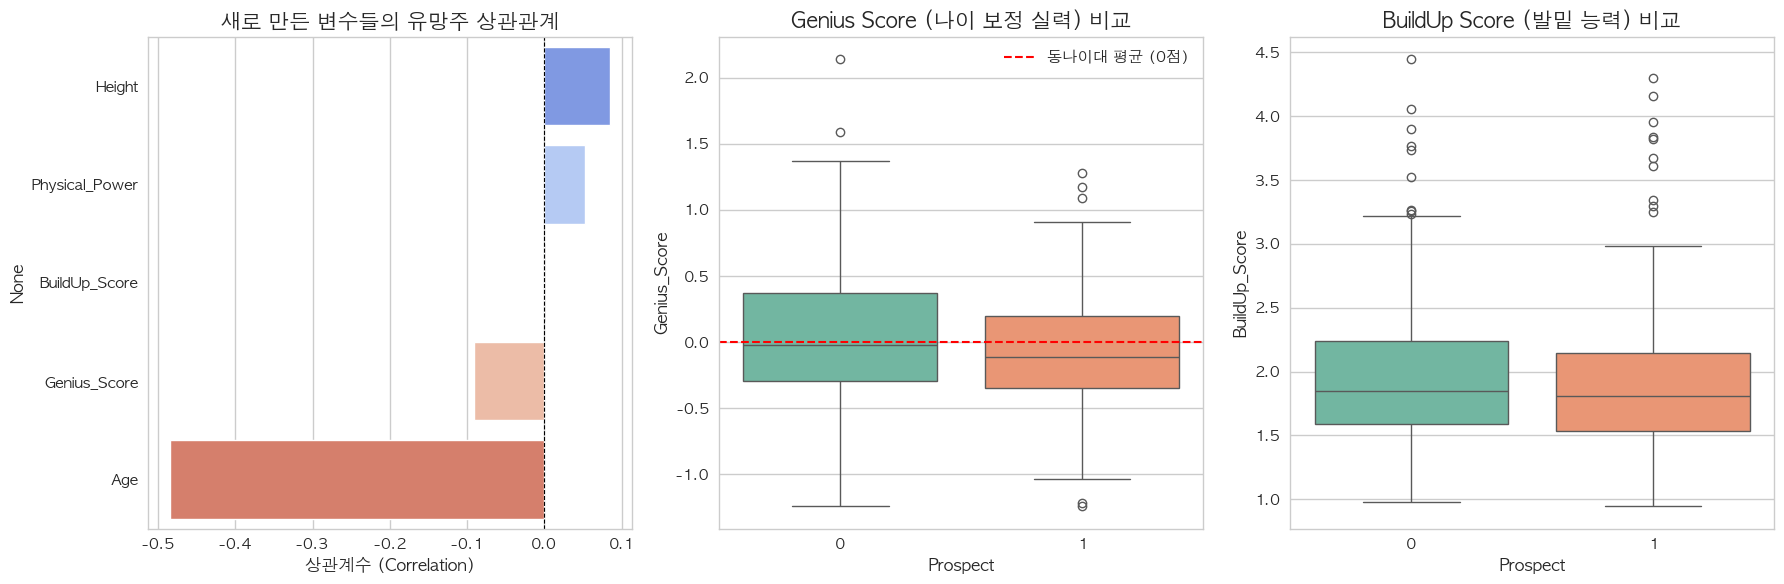

In [ ]:
# 1. 폰트 설정 (Mac)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 도화지 준비 (가로로 긴 3칸짜리 그래프)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- 첫 번째 그래프: 상관관계 막대 (Correlation Bar) ---
# 유망주(Prospect)와 가장 관련 깊은 변수가 무엇인지 순위대로 보여줍니다.
corrs = df_final.corr()['Prospect'].drop('Prospect').sort_values(ascending=False)

sns.barplot(x=corrs.values, y=corrs.index, palette='coolwarm', ax=axes[0])
axes[0].set_title('새로 만든 변수들의 유망주 상관관계', fontsize=15, fontweight='bold')
axes[0].set_xlabel('상관계수 (Correlation)')
axes[0].axvline(0, color='black', linestyle='--', linewidth=0.8) # 0점 기준선

# --- 두 번째 그래프: Genius Score (나이 보정 실력) ---
# 0(탈락)과 1(유망주)의 실력 차이를 상자 그림으로 비교합니다.
sns.boxplot(data=df_final, x='Prospect', y='Genius_Score', palette='Set2', ax=axes[1])
axes[1].set_title('Genius Score (나이 보정 실력) 비교', fontsize=15, fontweight='bold')
axes[1].axhline(0, color='red', linestyle='--', label='동나이대 평균 (0점)') # 평균선
axes[1].legend()

# --- 세 번째 그래프: BuildUp Score (발밑 능력) ---
# 현대 골키퍼의 필수 조건인 빌드업 능력을 비교합니다.
sns.boxplot(data=df_final, x='Prospect', y='BuildUp_Score', palette='Set2', ax=axes[2])
axes[2].set_title('BuildUp Score (발밑 능력) 비교', fontsize=15, fontweight='bold')

# 3. 마무리 (레이아웃 정리)
plt.tight_layout()
plt.show()